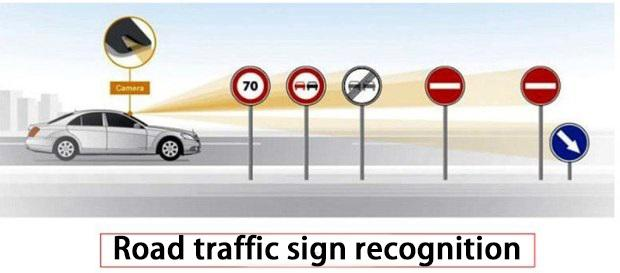

# Traffic Sign Recognition Classifier

In this project, we developed a Traffic Sign Classification model using various neural network architectures, including AlexNet, DenseNet, ResNet50, ResNet101, VGGNet, and CNN. The objective was to accurately classify traffic signs based on their visual features.

We trained and evaluated each model using a large dataset of traffic sign images. The training process involved optimizing the model parameters and adjusting hyperparameters to achieve the best performance. We utilized different architectural configurations for each model to explore their capabilities in traffic sign classification.

Our experimental results showed remarkable accuracy across the different models. The model accuracies ranged from 96% to 98% during training, indicating their ability to learn and classify the various traffic sign classes accurately. Furthermore, the test accuracy results ranged between 86% to 97%, demonstrating the models' generalization performance on unseen data.

The comparison of the different neural network models highlighted the strengths and weaknesses of each architecture. Some models, such as ResNet50 and ResNet101, showcased excellent performance due to their deep and residual network structures. Others, such as VGGNet and AlexNet, also achieved high accuracies by leveraging different convolutional layers and pooling operations.

Overall, our study demonstrated the effectiveness of utilizing various neural network architectures for traffic sign classification. The obtained accuracies provide evidence of the models' capability to recognize and classify traffic signs accurately. These findings contribute to the development of intelligent transportation systems and pave the way for enhanced road safety through automated traffic sign recognition.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#cd /content/drive/MyDrive/COMP8610_Final_Project/Traffic-sign-classification
import os
os.chdir('/content/drive/MyDrive/COMP8610_Final_Project/Traffic-sign-classification')


In [3]:
!ls

 ANC_Model_1.h5      best_vggnet.h5
 ANC_Model_2.h5      Datasets
 Best_AlexNet.h5     FutureMobilityChallenge-main
 best_CNN_model.h5  'Image Classification using SGAN - v2.pptx'
 Best_DenseNet.h5    Road_Traffic_Sign_Classifier.ipynb
 best_res101.h5      signname.csv
 best_res50.h5	     SS_GAN_vs_CNN_MNIST.ipynb


## Dataset
I downloded the German Traffic Sign Recognition Benchmark Data-set from the below source:
https://www.v7labs.com/open-datasets/gtsrb#:~:text=The%20German%20Traffic%20Sign%20Recognition,light%20conditions%20and%20rich%20backgrounds.&text=V7%20uses%20cookies%20to%20keep,your%20experience%20and%20for%20marketing.


## Import Packages and Load Dataset

In [4]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load pickled data
import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv


## Loading datasets
training_file = 'Datasets/train.p'
validation_file='Datasets/valid.p'
testing_file = 'Datasets/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_names = read_csv("signname.csv").values[:, 1]

#Separating features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Dataset Summary & Exploration

In [5]:
# Number of training examples
n_train = X_train.shape[0]
# Number of validation examples
n_validation = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Histogram of class distrubtions across data set splits

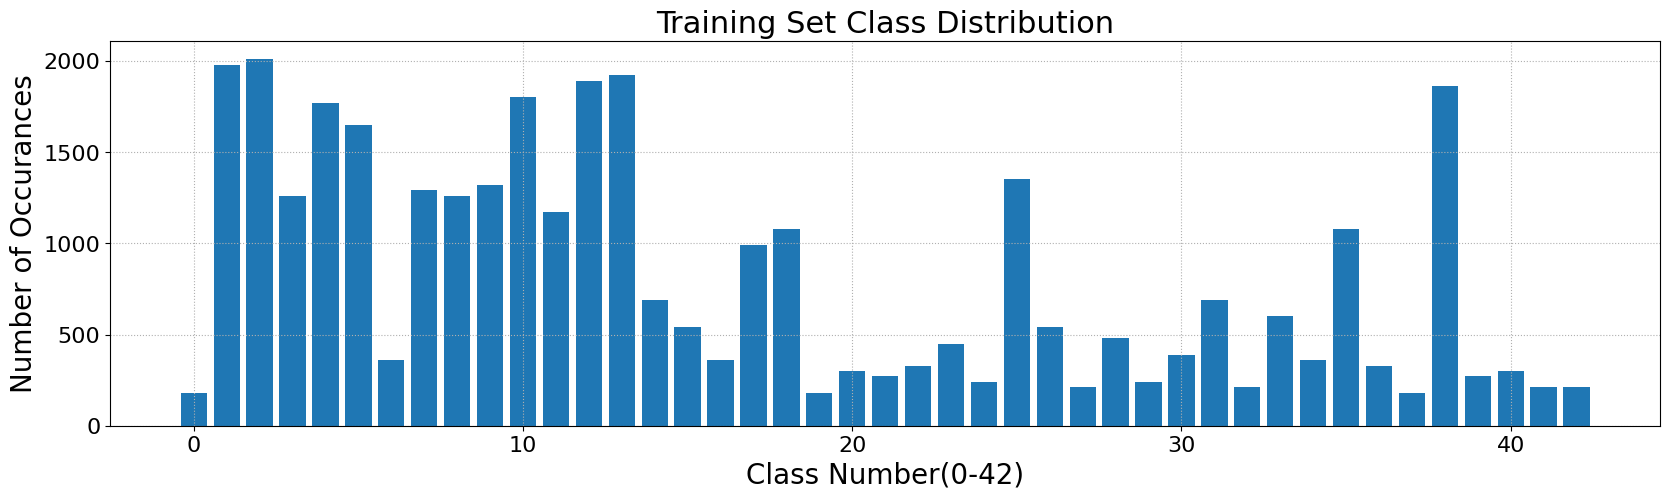

In [6]:
#Plot to show frequencies of data for Training dataset
plt.figure(0, figsize = (20,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


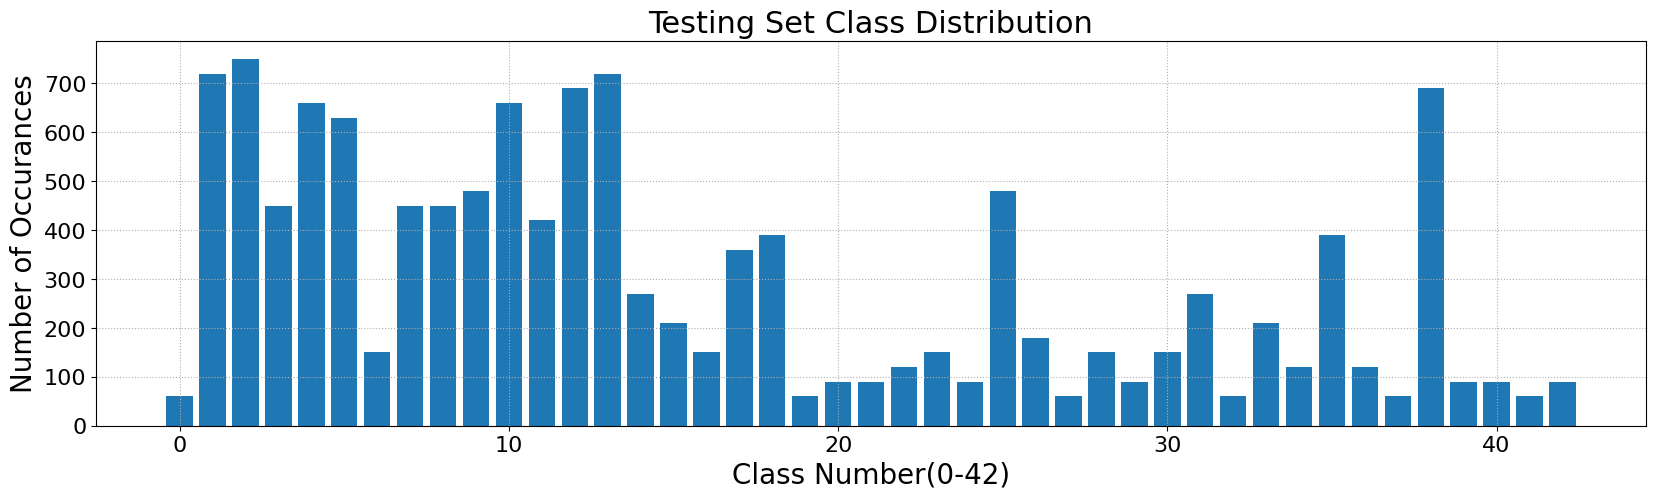

In [7]:
#Plot to show frequencies of data for Testing dataset
plt.figure(0, figsize = (20,5))
unique_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_test, counts_test)

plt.title('Testing Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


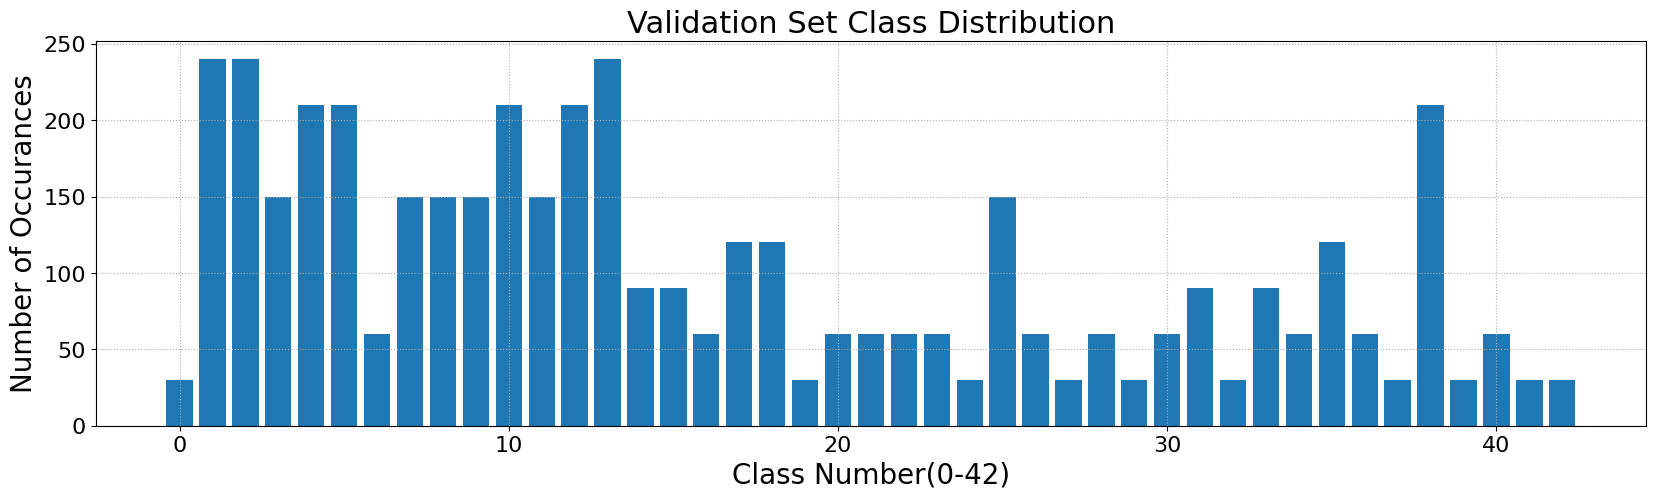

In [8]:
#Plot to show frequencies of data for Validation dataset
plt.figure(0, figsize = (20,5))
unique_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_valid, counts_valid)

plt.title('Validation Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


### Visualise all Images Classes

0 . Class :  Speed limit (20km/h)


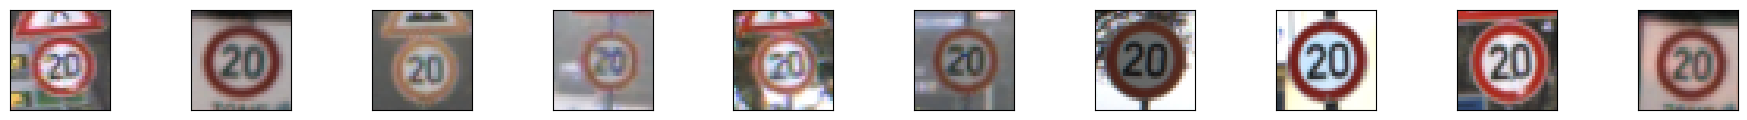

1 . Class :  Speed limit (30km/h)


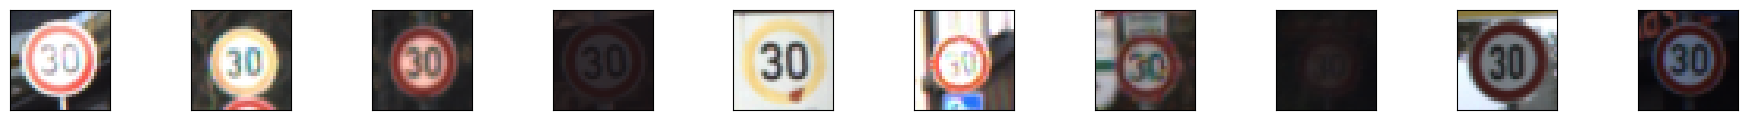

2 . Class :  Speed limit (50km/h)


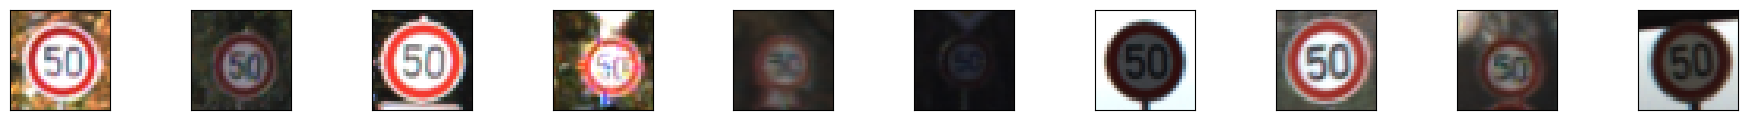

3 . Class :  Speed limit (60km/h)


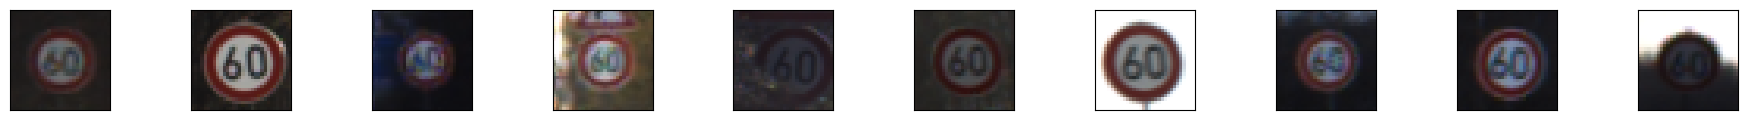

4 . Class :  Speed limit (70km/h)


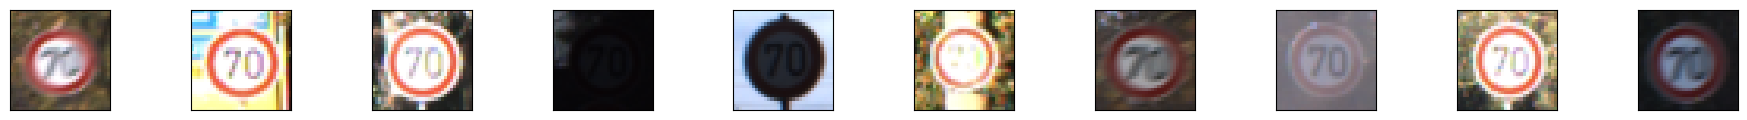

5 . Class :  Speed limit (80km/h)


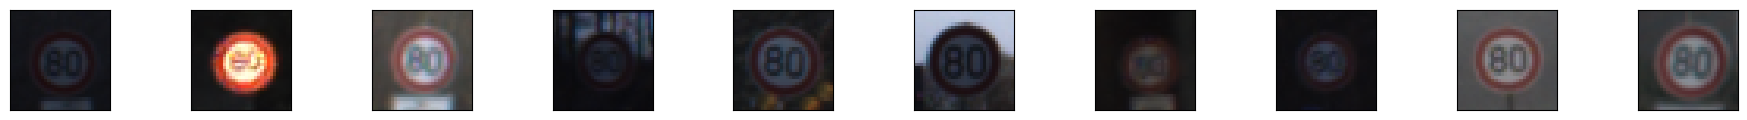

6 . Class :  End of speed limit (80km/h)


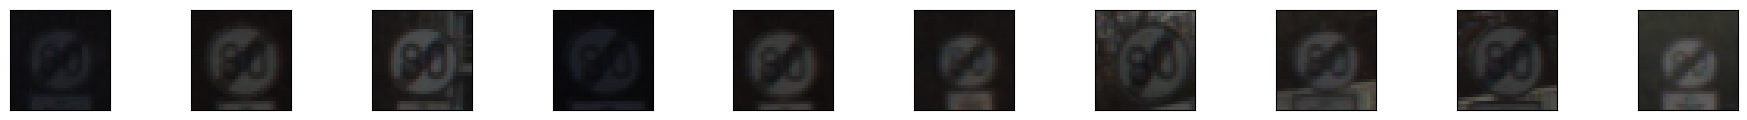

7 . Class :  Speed limit (100km/h)


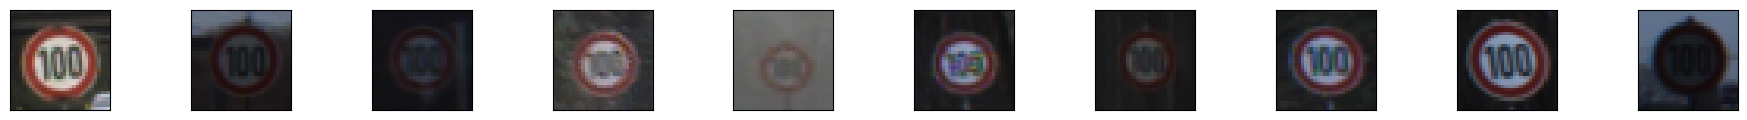

8 . Class :  Speed limit (120km/h)


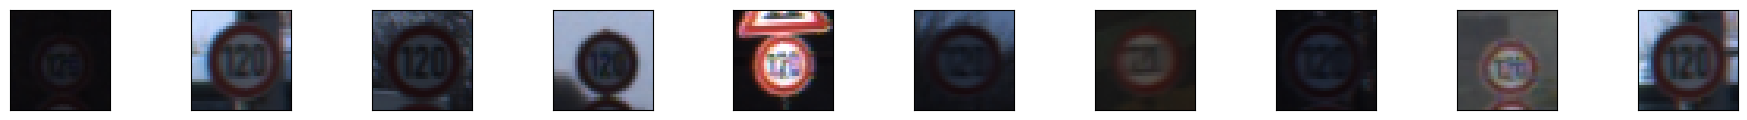

9 . Class :  No passing


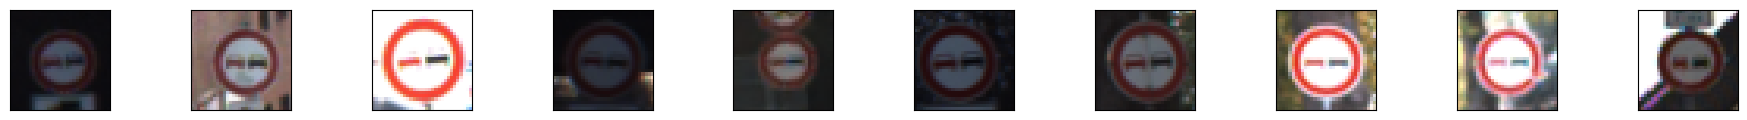

10 . Class :  No passing for vehicles over 3.5 metric tons


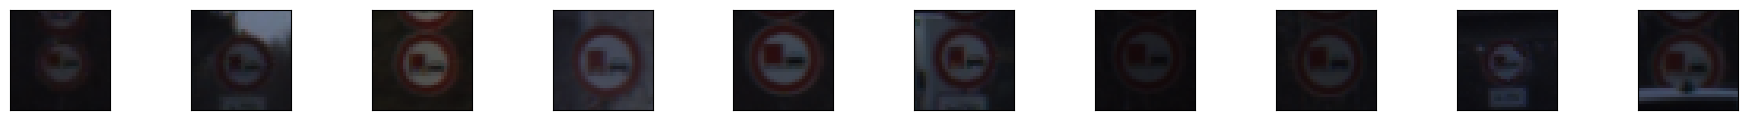

11 . Class :  Right-of-way at the next intersection


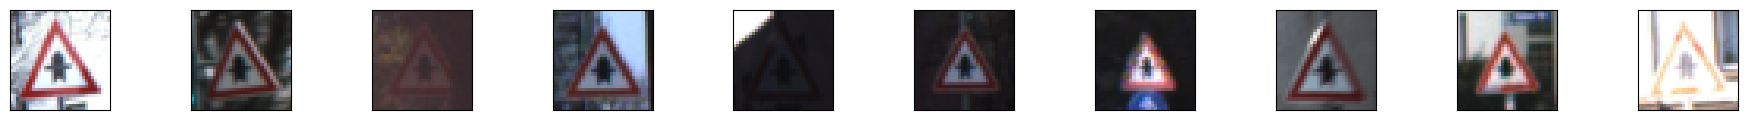

12 . Class :  Priority road


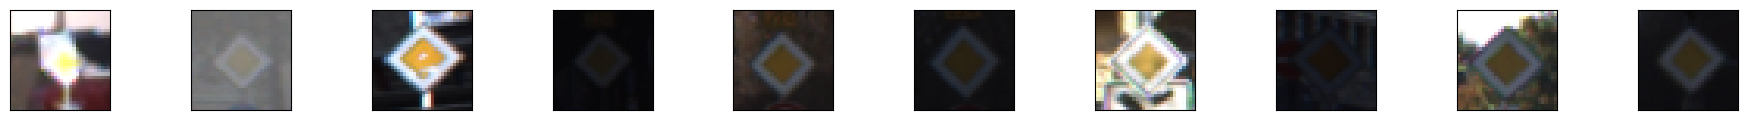

13 . Class :  Yield


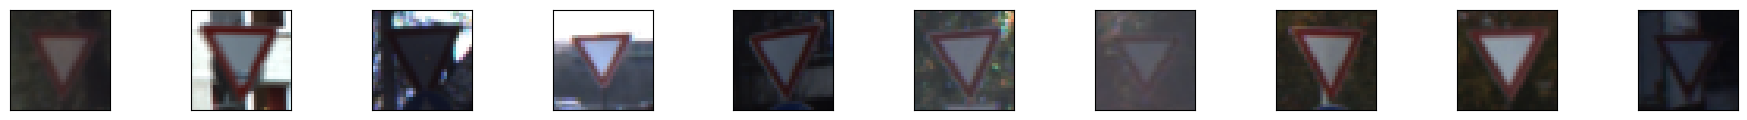

14 . Class :  Stop


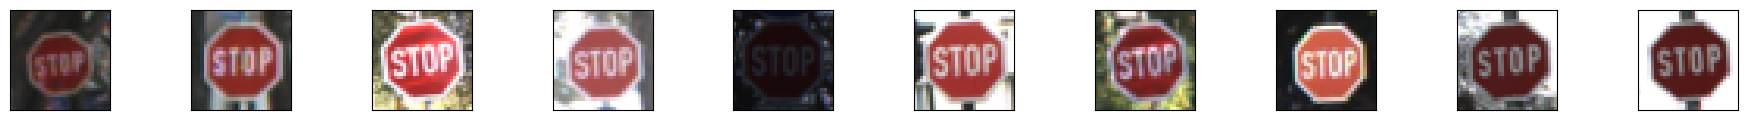

15 . Class :  No vehicles


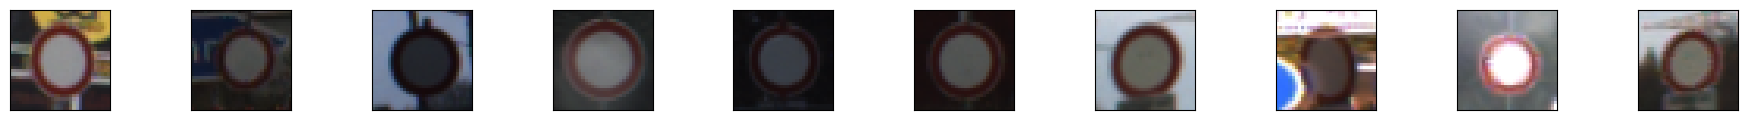

16 . Class :  Vehicles over 3.5 metric tons prohibited


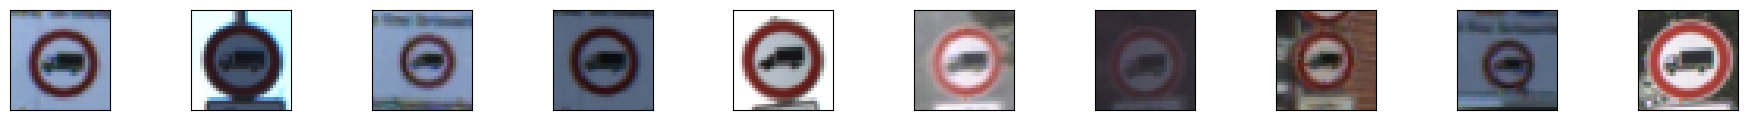

17 . Class :  No entry


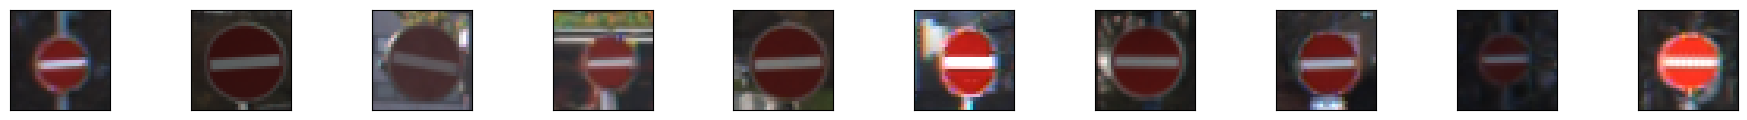

18 . Class :  General caution


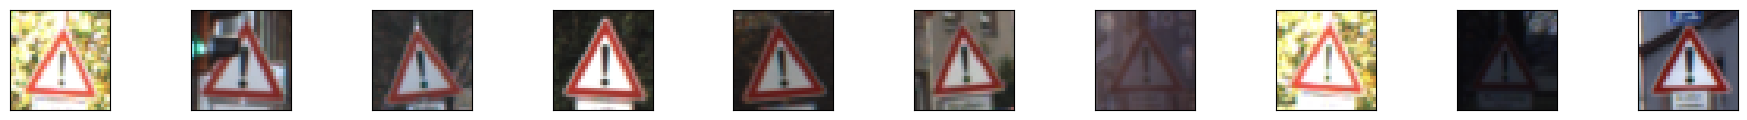

19 . Class :  Dangerous curve to the left


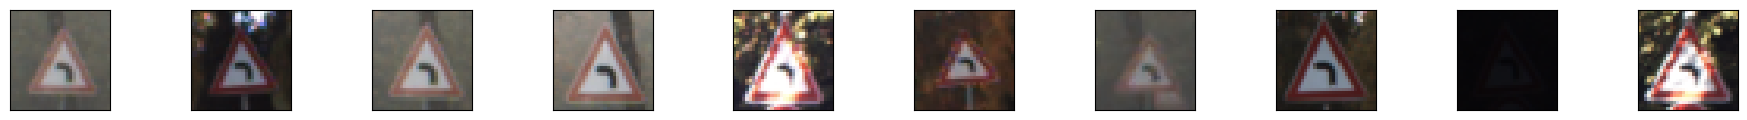

20 . Class :  Dangerous curve to the right


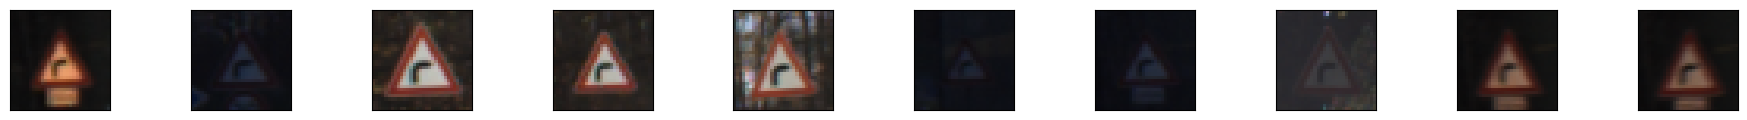

21 . Class :  Double curve


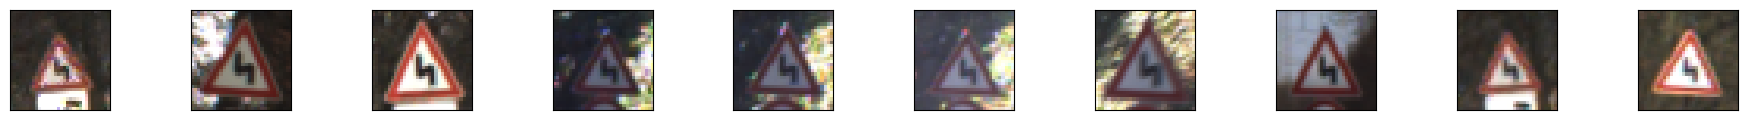

22 . Class :  Bumpy road


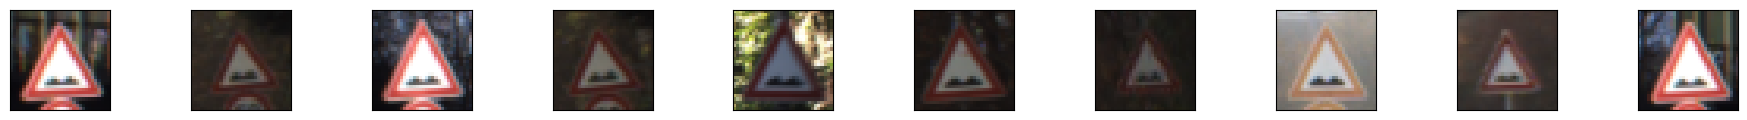

23 . Class :  Slippery road


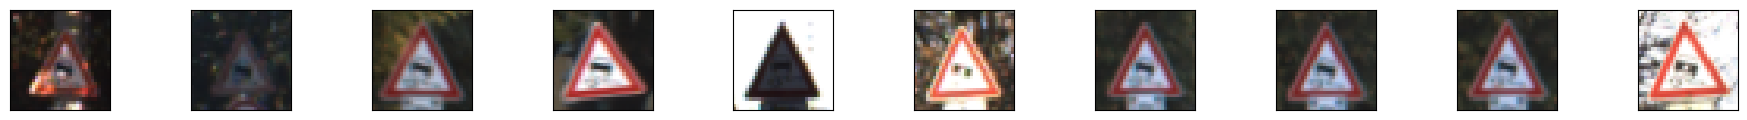

24 . Class :  Road narrows on the right


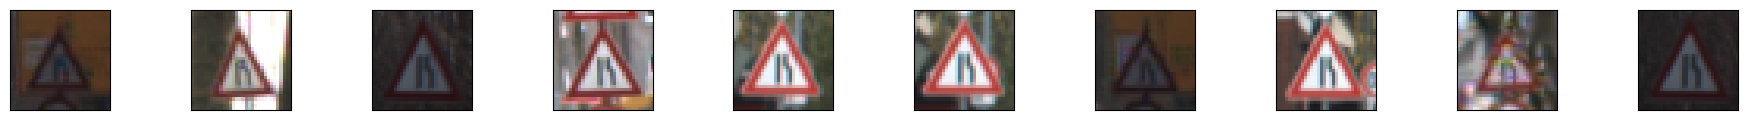

25 . Class :  Road work


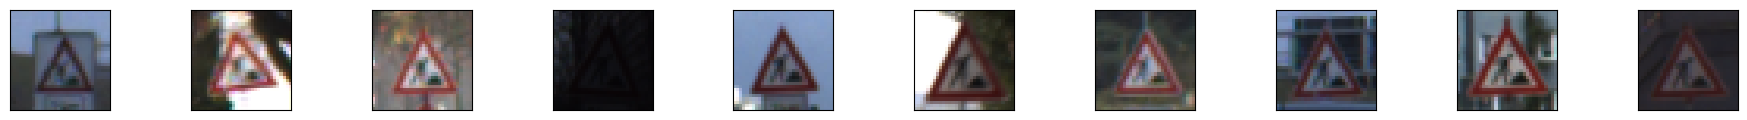

26 . Class :  Traffic signals


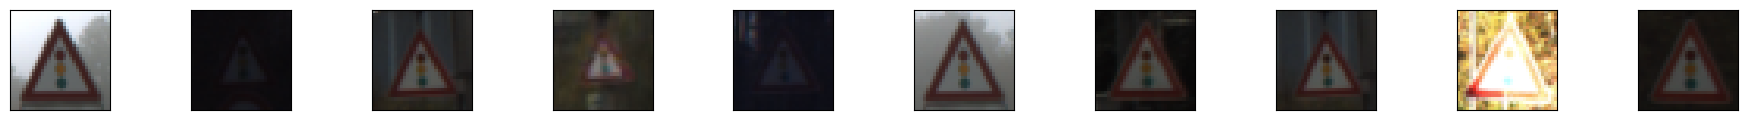

27 . Class :  Pedestrians


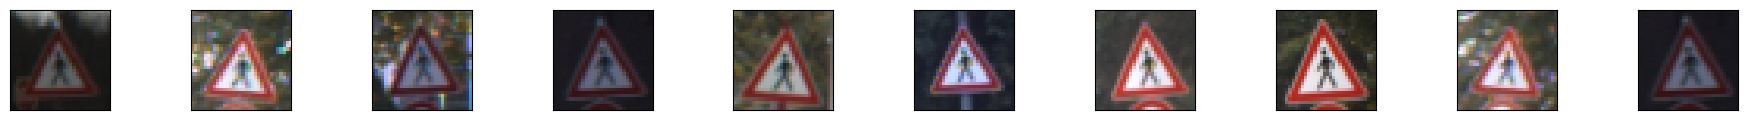

28 . Class :  Children crossing


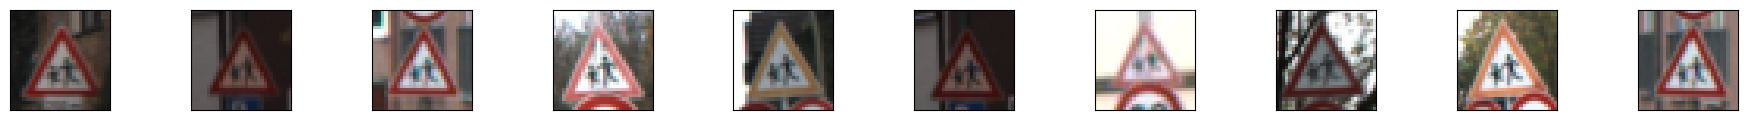

29 . Class :  Bicycles crossing


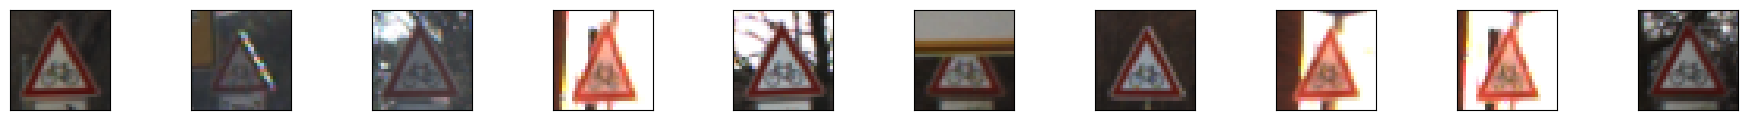

30 . Class :  Beware of ice/snow


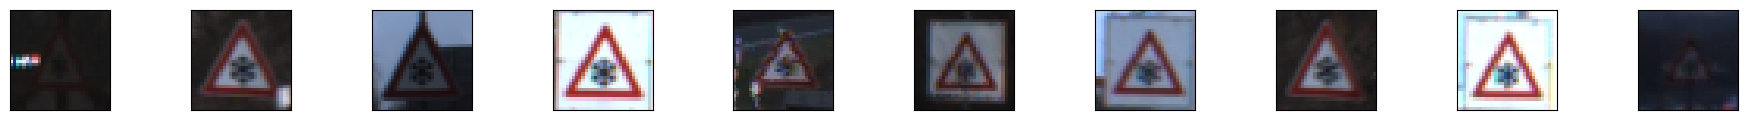

31 . Class :  Wild animals crossing


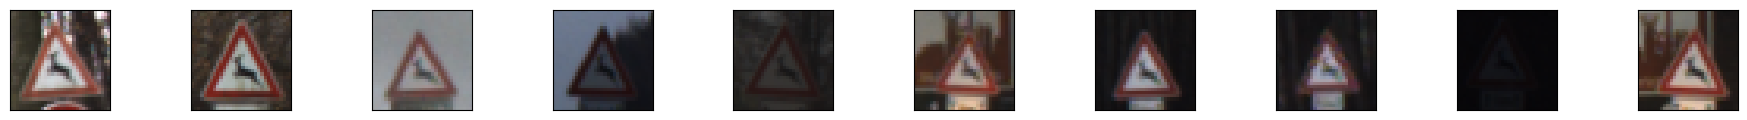

32 . Class :  End of all speed and passing limits


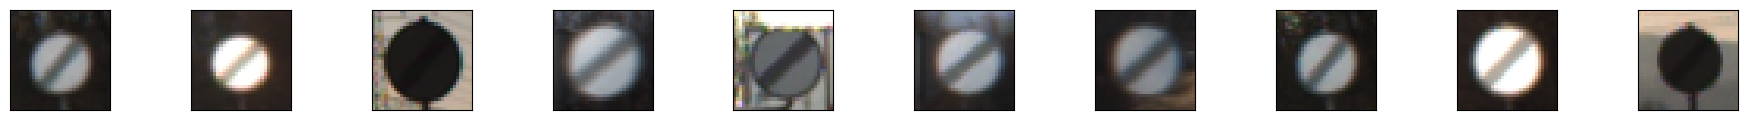

33 . Class :  Turn right ahead


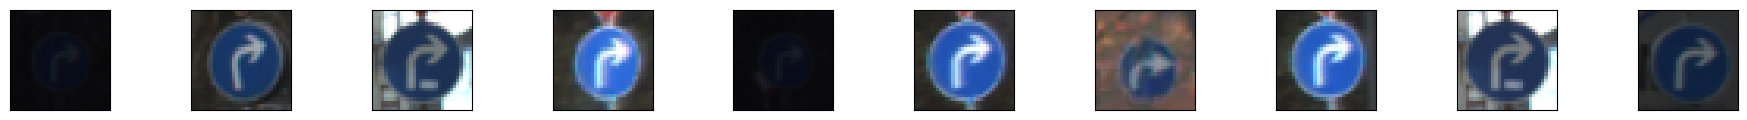

34 . Class :  Turn left ahead


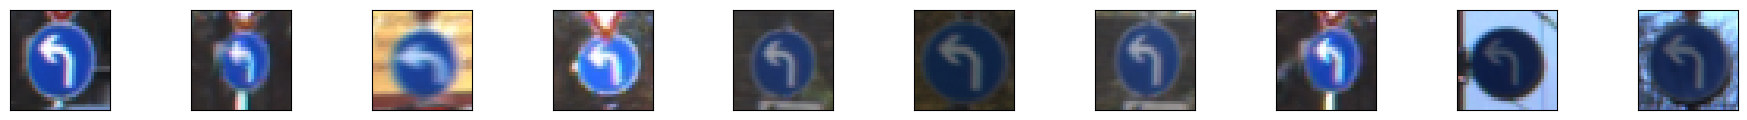

35 . Class :  Ahead only


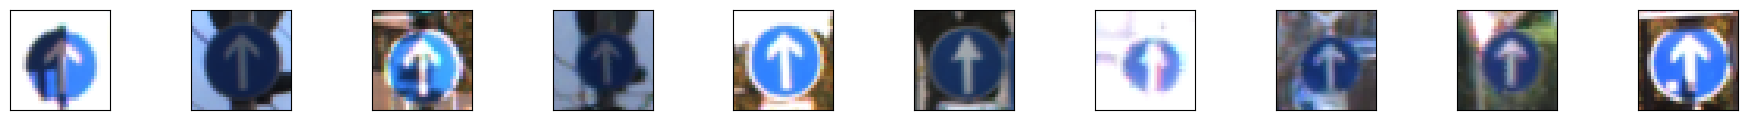

36 . Class :  Go straight or right


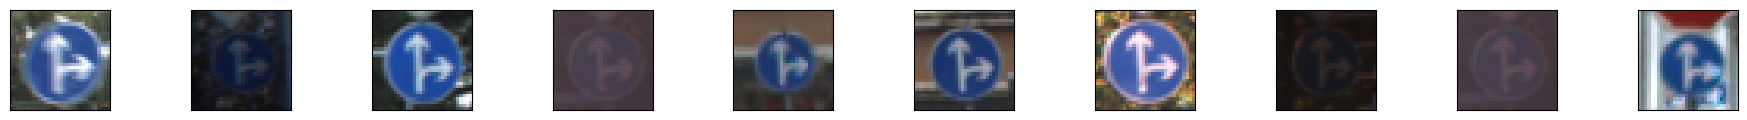

37 . Class :  Go straight or left


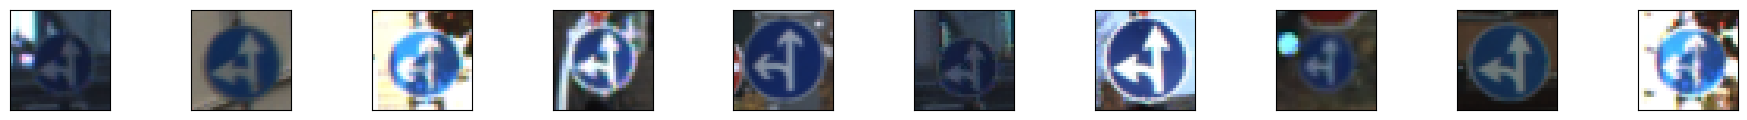

38 . Class :  Keep right


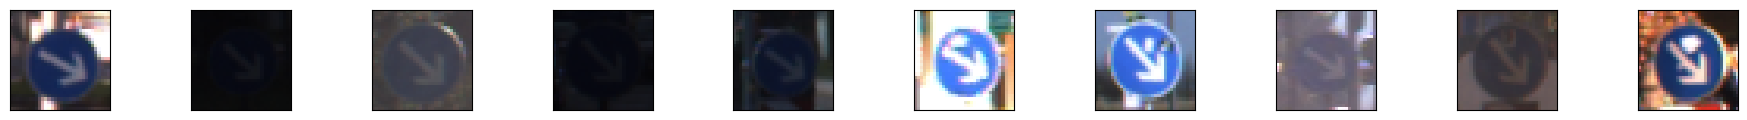

39 . Class :  Keep left


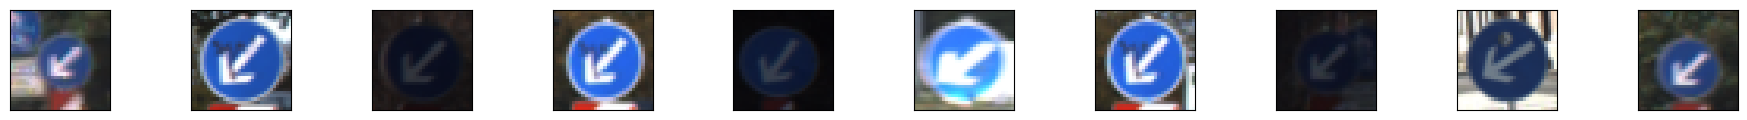

40 . Class :  Roundabout mandatory


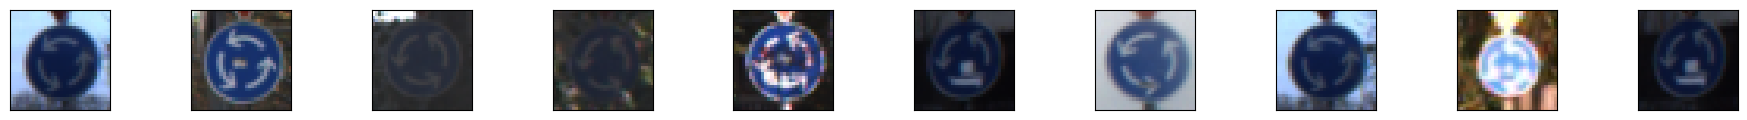

41 . Class :  End of no passing


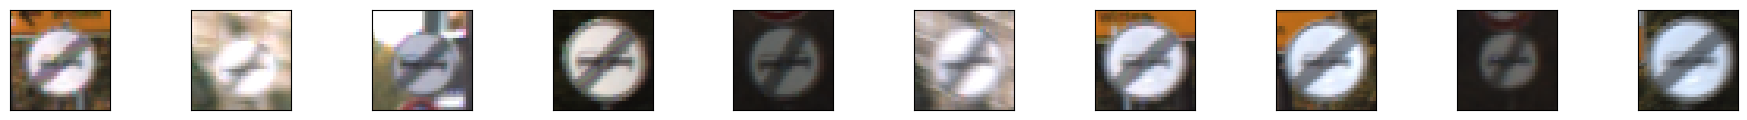

42 . Class :  End of no passing by vehicles over 3.5 metric


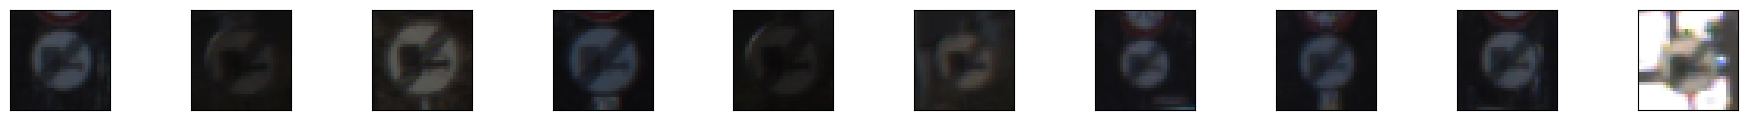

In [9]:
#Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c] )
    fig = pyplot.figure(figsize = (18, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(X_train[random_indices[i],:,:,:])
        #axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)

    pyplot.show()

### Brief Visual Overview of the Dataset

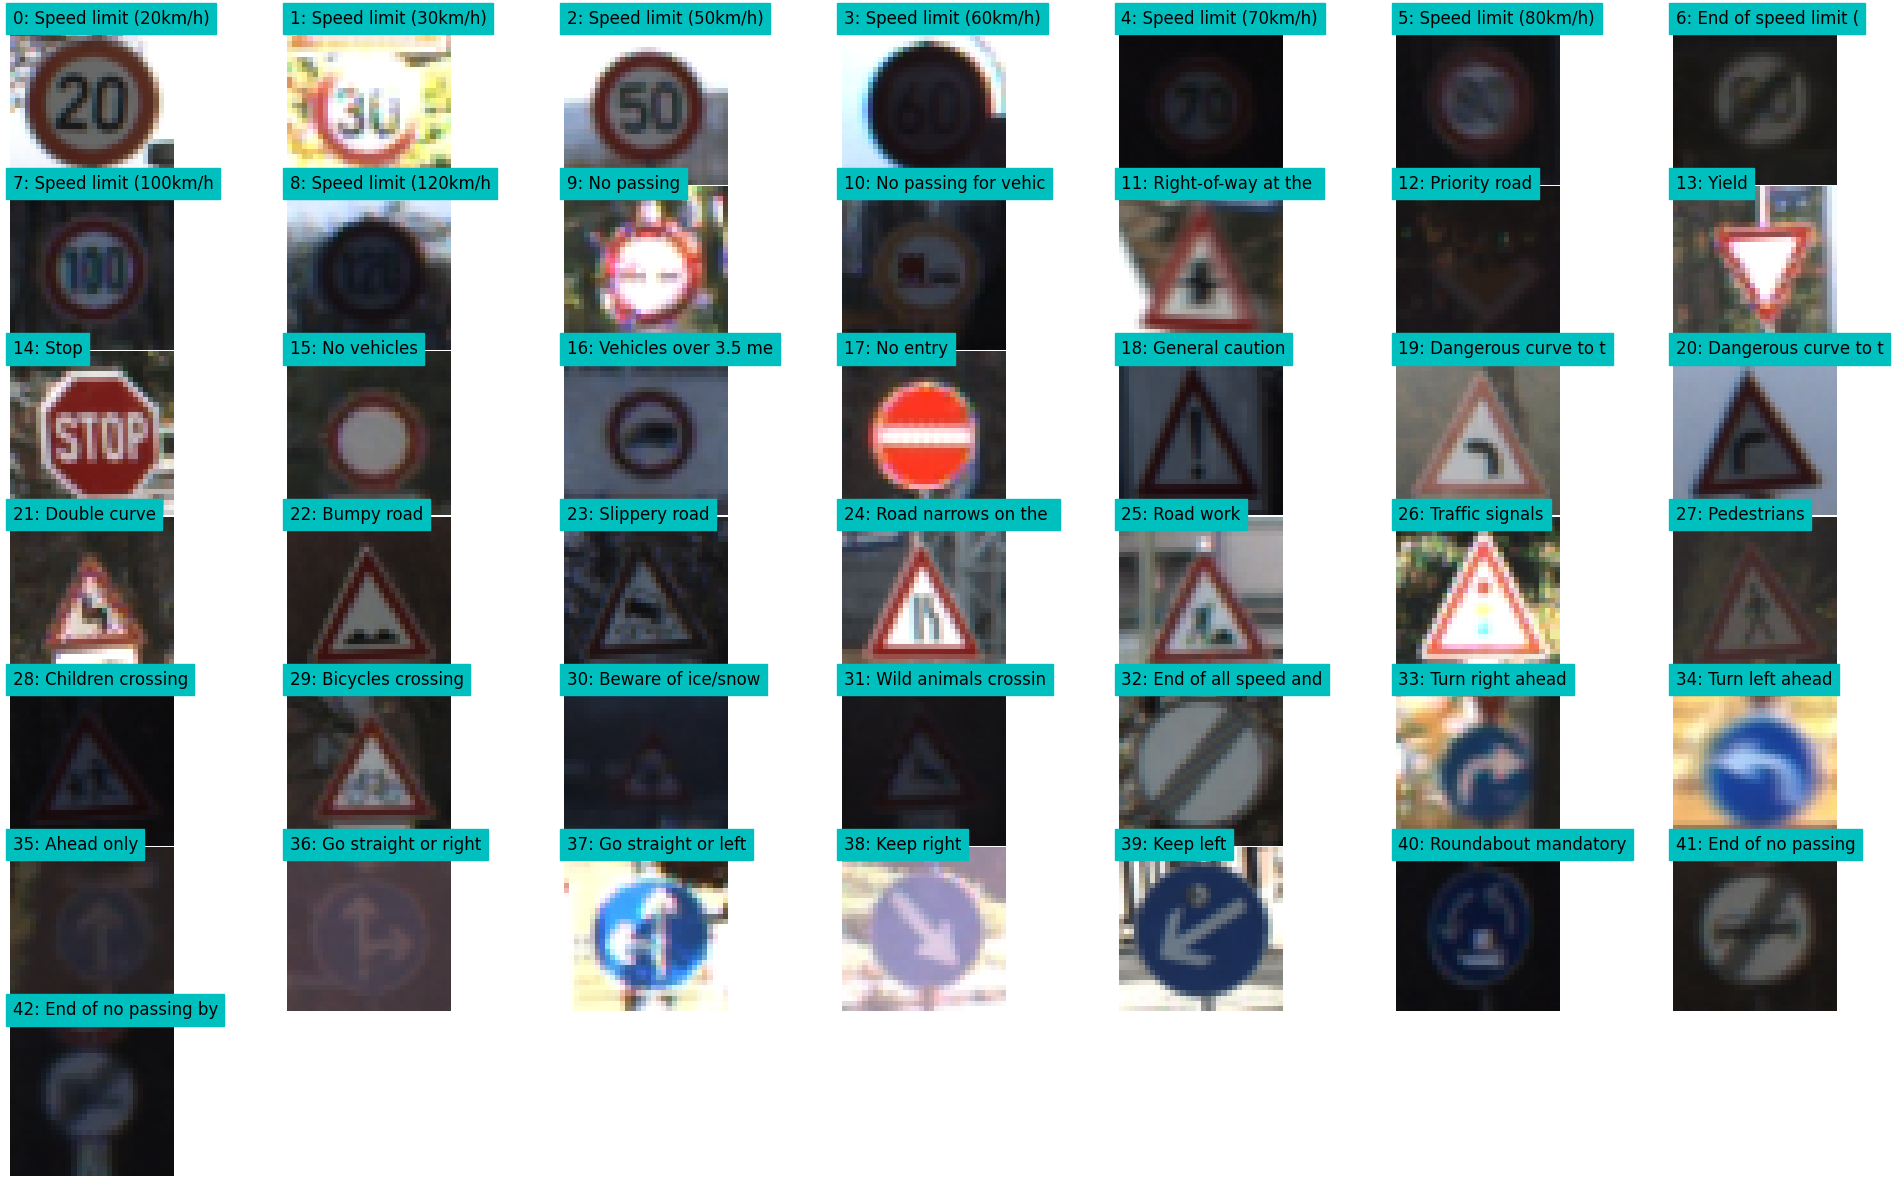

In [10]:
#Showing Random image datasets for each class
def plot_random_each_class(n_row,n_col,X,y):

    plt.figure(figsize = (25,15))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes.

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X[ind_plot])
        #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)

        plt.axis('off')
    plt.show()

plot_random_each_class(7,7,X_train,y_train)


## Data Augmentation


Since the distribution of classes over the data set is extreamly unblanced.We can use data augmentation to create more datsets because unbalanced datasets will cause a heavy amount of bias in the training process.


In [11]:
!pip install opencv-python

In [12]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def rotate_image(image, max_angle =15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans = 5, height=32, width=32):
    translate_x = max_trans*np.random.uniform() - max_trans/2
    translate_y = max_trans*np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height,width))
    return trans

def projection_transform(image, max_warp=0.8, height=32, width=32):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)

    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin

    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image


def transform_image(image, max_angle=15, max_trans =5 ,max_warp=0.8):
    ## Simple pipline to take an input image and apply a serise of simple
    ## Distortions to augment the training data set
    ## (note: this function will rescale pixel values between 0-1)
    ##
    height, width, channels = image.shape
    #Rotate Image
    rotated_image = rotate_image(image, max_angle)
    #Translate Image
    translated_image = translate_image(rotated_image, max_trans, height, width)
    #Project Image
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image*255.0).astype(np.uint8)


def augment_and_balance_data(X_train, y_train, no_examples_per_class =5000):

    n_examples = no_examples_per_class
    #Get paramters of data
    classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
    height, width, channels = X_train[0].shape


    #Create new data and labels for the balanced augmented data
    X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    y_balance = np.empty([0], dtype = y_train.dtype)


    for c, count in zip(range(n_classes), class_counts):
        ##Copy over the current data for the given class
        X_orig = X_train[y_train == c]
        y_orig = y_train[y_train == c]
        ##Add original data to the new dataset
        X_balance = np.append(X_balance, X_orig, axis=0)
        print(c,count)
        temp_X = np.empty([n_examples-count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
        for i in range(n_examples - count):
            temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))


        X_balance = np.append(X_balance,temp_X, axis=0)
        n_added_ex = X_balance.shape[0] - y_balance.shape[0]
        y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype =int))


    return X_balance.astype(np.uint8), y_balance



### Data Augmentation by Rotation

In [13]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(rotate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Translation

In [14]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(translate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Homography Projection

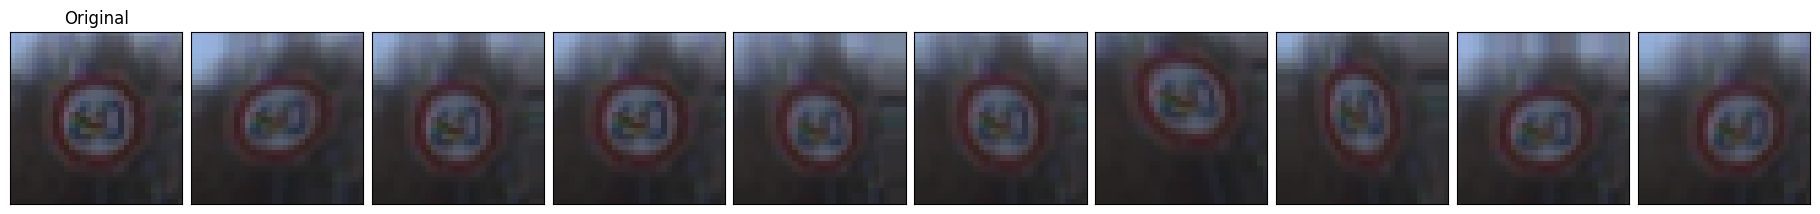

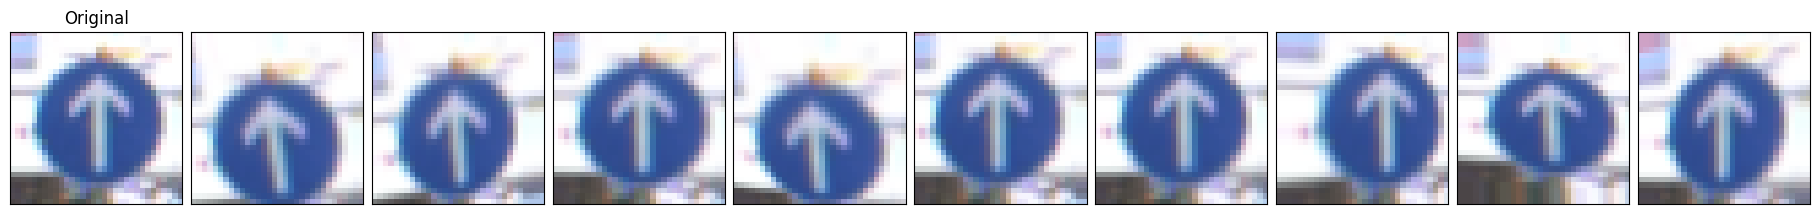

In [15]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(projection_transform(X_train[image[j],:,:,:]))
    pyplot.show()

### Pipeline for Data Augmentation

In [16]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(transform_image(X_train[image[j],:,:,:]))
    pyplot.show()

### Generate or Load Augmented Dataset

In [17]:
####Only Run to generate Augmented data

#X_out, y_out = augment_and_balance_data(X_train, y_train, 5000)
#np.savez_compressed('Datasets/Augmented_Data/AugTrafficdata', X_train_aug = X_out, y_train_aug = y_out)

In [18]:
##Load augmented data

loaded = np.load('Datasets/Augmented_Data/AugTrafficdata.npz')
X_train_aug = loaded['X_train_aug']
y_train_aug = loaded['y_train_aug']
print("Augmented Dataset size X", X_train_aug.shape)
print("Augmented Dataset size y", y_train_aug.shape)


Augmented Dataset size X (215000, 32, 32, 3)
Augmented Dataset size y (215000,)



## Deep Classification Architectures


We will consider AlexNet convolutional neural network architectures for this challenge.

AlexNet (2012)(CIFAR10 Style) :  Classic architecture with additional Batch Normalisation layers to assist training

  1. Convolution layers are utilized to extract specific features from images by applying filters. These layers simultaneously learn multiple features from the input and utilize them for image classification.

  2. Pooling layers are employed to downsample feature maps and detect features effectively.

  3. BatchNormalization layers are used to normalize data, preventing overfitting in the model.

  4. The Flatten layer converts multi-dimensional input into a 1-dimensional format, enabling it to be fed into fully connected dense layers.

  5. Fully connected layers establish connections between all input and output neurons.

  6. Stride is a parameter in convolutional neural networks that determines the amount of movement over images or video data during filtering.

  7. Padding in convolutional neural networks refers to the additional pixels added to an image when processed by the kernel, aiding the operations of a CNN.

### Tensorflow Installation

In [19]:
!pip install tensorflow

## Data Preprocessig

In [20]:
from sklearn.utils import shuffle

## Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

In [21]:
# Convert RGB images to grayscale for the training set
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the testing set
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the validation set
X_validation_gray  = np.sum(X_valid/3, axis=3, keepdims=True)


In [22]:
# Normalize the training set of grayscale images
X_train_gray_norm = (X_train_gray - 32) / 32

# Normalize the test set of grayscale images
X_test_gray_norm = (X_test_gray - 32) / 32

# Normalize the validation set of grayscale images
X_validation_gray_norm = (X_validation_gray - 32) / 32


In [23]:
# Onehot Encoding the labels.
from tensorflow.keras.utils import to_categorical

# Store the original labels for future reference
y_train_unchanged = y_train
y_validation_unchanged = y_valid
y_test_unchanged = y_test

# Perform Onehot Encoding on the labels
# Convert the labels from integer representation to binary matrix representation
y_train = to_categorical(y_train)
y_validation = to_categorical(y_valid)
y_test = to_categorical(y_test)


In [24]:
# Shape of Train dataset
X_train.shape

(34799, 32, 32, 3)

In [25]:
# Shape of Test dataset
X_test.shape

(12630, 32, 32, 3)

In [26]:
# Shape of Validation dataset
X_valid.shape

(4410, 32, 32, 3)

## Model Architecture -1 : ALEXNET

The code implements AlexNet, a convolutional neural network architecture used for image classification. It utilizes Keras to construct the model, which consists of convolutional, fully connected, and activation layers. The network is designed to classify images into 43 different classes.

AlexNet starts with convolutional layers followed by batch normalization and activation functions. Max pooling is used to downsample the feature maps. The flattened input is passed through fully connected layers with dropout regularization to prevent overfitting. The final output layer employs softmax activation for multiclass classification. The model summary provides a detailed overview of the layers and their parameters.

In summary, the code defines a powerful image classification model, AlexNet, using Keras. It incorporates convolutional and fully connected layers along with activation functions and batch normalization. The model is capable of classifying images into multiple classes, and the summary offers insights into its structure.

In [27]:
# Define the architecture of AlexNet
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

# Create a Sequential model
AlexNet = Sequential()

# Add the 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# Add the 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Print the model summary
AlexNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          11712     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [28]:
# Compile the AlexNet model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the AlexNet model on the training data, for a total of 20 epochs, with validation data for monitoring performance
# X_train_gray_norm and y_train represent the preprocessed and normalized training data
# X_validation_gray_norm and y_validation represent the preprocessed and normalized validation data
history = AlexNet.fit(X_train_gray_norm, y_train, epochs=50, validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/50
1088/1088 [==============================] - 36s 14ms/step - loss: 2.5266 - accuracy: 0.3676 - val_loss: 2.1088 - val_accuracy: 0.4150
Epoch 2/50
1088/1088 [==============================] - 13s 12ms/step - loss: 1.1949 - accuracy: 0.7125 - val_loss: 1.6801 - val_accuracy: 0.5955
Epoch 3/50
1088/1088 [==============================] - 13s 12ms/step - loss: 0.7788 - accuracy: 0.8195 - val_loss: 1.2147 - val_accuracy: 0.6814
Epoch 4/50
1088/1088 [==============================] - 13s 12ms/step - loss: 0.5790 - accuracy: 0.8682 - val_loss: 0.9594 - val_accuracy: 0.7596
Epoch 5/50
1088/1088 [==============================] - 13s 12ms/step - loss: 0.4405 - accuracy: 0.9030 - val_loss: 0.9489 - val_accuracy: 0.7592
Epoch 6/50
1088/1088 [==============================] - 14s 13ms/step - loss: 0.3608 - accuracy: 0.9228 - val_loss: 1.2182 - val_accuracy: 0.6798
Epoch 7/50
1088/1088 [==============================] - 13s 12ms/step - loss: 0.2908 - accuracy: 0.9392 - val_loss: 0.8734 -

In [29]:
import tensorflow as tf

# Save the model
AlexNet.save("Best_AlexNet.h5")

#Loading Saved model
New_model1 = tf.keras.models.load_model('Best_AlexNet.h5')

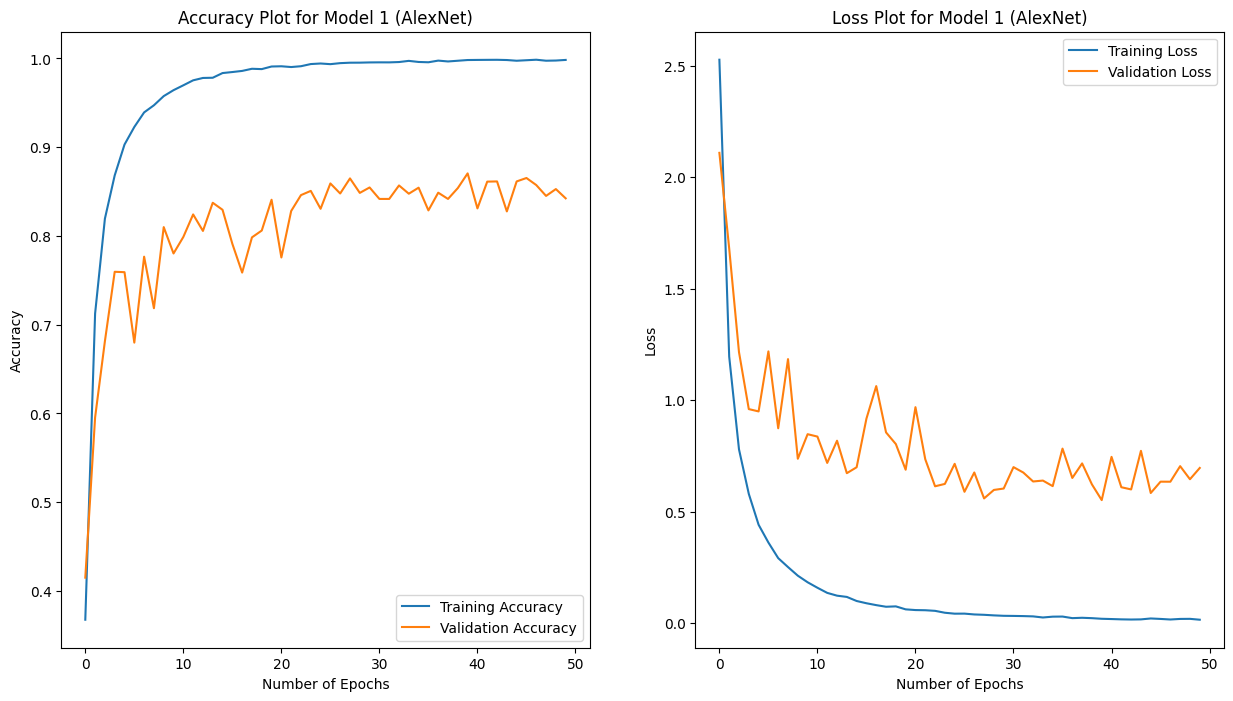

In [30]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 1 (AlexNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 1 (AlexNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 1 Evaluation & Report

In [31]:
New_model1.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.6197 - accuracy: 0.8657


[0.6196728348731995, 0.8657165765762329]

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = New_model1.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 1 (AlexNet):")
print(classification_rep)


395/395 [==============================] - 1s 3ms/step

Classification Report for Model 1 (AlexNet):
              precision    recall  f1-score   support

           0       0.97      0.53      0.69        60
           1       0.82      0.98      0.89       720
           2       0.93      0.89      0.91       750
           3       0.88      0.72      0.80       450
           4       0.86      0.87      0.86       660
           5       0.74      0.84      0.78       630
           6       0.98      0.83      0.90       150
           7       0.80      0.71      0.75       450
           8       0.67      0.93      0.78       450
           9       0.99      0.86      0.92       480
          10       0.98      0.87      0.92       660
          11       0.94      0.88      0.91       420
          12       0.95      0.90      0.93       690
          13       0.99      0.99      0.99       720
          14       0.96      0.88      0.92       270
          15       0.99      0.85 

In [33]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 1 (AlexNet)')
plt.show()


## Model Architecture -2 : DenseNET

Changes as compared to Architecture-1:

  Hyperparameter Modification: The second model incorporates changes in the hyperparameters. It includes early stopping and model checkpointing callbacks, which help in optimizing the training process by monitoring the validation loss and saving the best model.

  Class Weight Calculation: The second model calculates and applies class weights to handle class imbalance. It computes the class weights based on the distribution of the training data and assigns higher weights to underrepresented classes.

  Training Callbacks: The second model uses the early stopping callback to stop training when the validation loss stops improving. This helps prevent overfitting and improves generalization.

Overall, the below model introduces improved training strategies, such as class weighting and early stopping, to enhance performance and address class imbalance issues.

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.densenet import DenseNet121
from keras.layers.convolutional import Conv2D

import numpy as np

np.random.seed(1000)

# Create a Sequential model
model = Sequential()

# Add the 1st Convolutional Layer to expand single-channel input to three channels
model.add(Conv2D(filters=3, kernel_size=(1, 1), input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add the DenseNet121 base model
base_model = DenseNet121(include_top=False, input_shape=(32, 32, 3))
model.add(base_model)

# Flatten the input
model.add(Flatten())

# Add the 1st Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the Output layer
model.add(Dense(43))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Print the model summary
model.summary()


29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 3)         6         
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 3)        12        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 32, 32, 3)         0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 4096)              

In [35]:
from tensorflow.keras.optimizers import Adam

# Compile the AlexNet model with specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with the specified training data, validation data, callbacks, and batch size
history = model.fit(X_train_gray_norm, y_train, epochs=25, validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/25
1088/1088 [==============================] - 171s 86ms/step - loss: 1.1285 - accuracy: 0.7393 - val_loss: 0.7714 - val_accuracy: 0.8224
Epoch 2/25
1088/1088 [==============================] - 88s 81ms/step - loss: 0.4084 - accuracy: 0.9244 - val_loss: 0.3947 - val_accuracy: 0.9138
Epoch 3/25
1088/1088 [==============================] - 88s 81ms/step - loss: 0.2416 - accuracy: 0.9567 - val_loss: 0.4349 - val_accuracy: 0.9175
Epoch 4/25
1088/1088 [==============================] - 88s 81ms/step - loss: 0.1674 - accuracy: 0.9696 - val_loss: 0.3513 - val_accuracy: 0.9299
Epoch 5/25
1088/1088 [==============================] - 87s 80ms/step - loss: 0.1251 - accuracy: 0.9764 - val_loss: 0.3056 - val_accuracy: 0.9347
Epoch 6/25
1088/1088 [==============================] - 89s 82ms/step - loss: 0.1010 - accuracy: 0.9802 - val_loss: 0.2317 - val_accuracy: 0.9442
Epoch 7/25
1088/1088 [==============================] - 88s 81ms/step - loss: 0.0918 - accuracy: 0.9820 - val_loss: 0.2299 

In [36]:
# Save the model
model.save("Best_DenseNet.h5")

#Loading Saved model
Best_DenseNet = tf.keras.models.load_model('Best_DenseNet.h5')

In [37]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 2 (DenseNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 2 (DenseNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 2 Evaluation & Report

In [38]:
Best_DenseNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 9s 17ms/step - loss: 0.2629 - accuracy: 0.9477


[0.26289743185043335, 0.9477434754371643]

In [39]:
# Assuming you have predictions for X_test_gray_norm
y_pred = Best_DenseNet.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 2:")
print(classification_rep)


395/395 [==============================] - 7s 11ms/step

Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.96      0.96      0.96       720
           2       0.91      0.99      0.95       750
           3       0.98      0.95      0.97       450
           4       0.95      0.96      0.95       660
           5       0.90      0.90      0.90       630
           6       1.00      0.71      0.83       150
           7       0.96      0.96      0.96       450
           8       0.93      0.95      0.94       450
           9       0.95      0.99      0.97       480
          10       0.98      0.98      0.98       660
          11       0.92      0.98      0.95       420
          12       0.96      0.98      0.97       690
          13       0.98      1.00      0.99       720
          14       1.00      0.96      0.98       270
          15       0.98      1.00      0.99

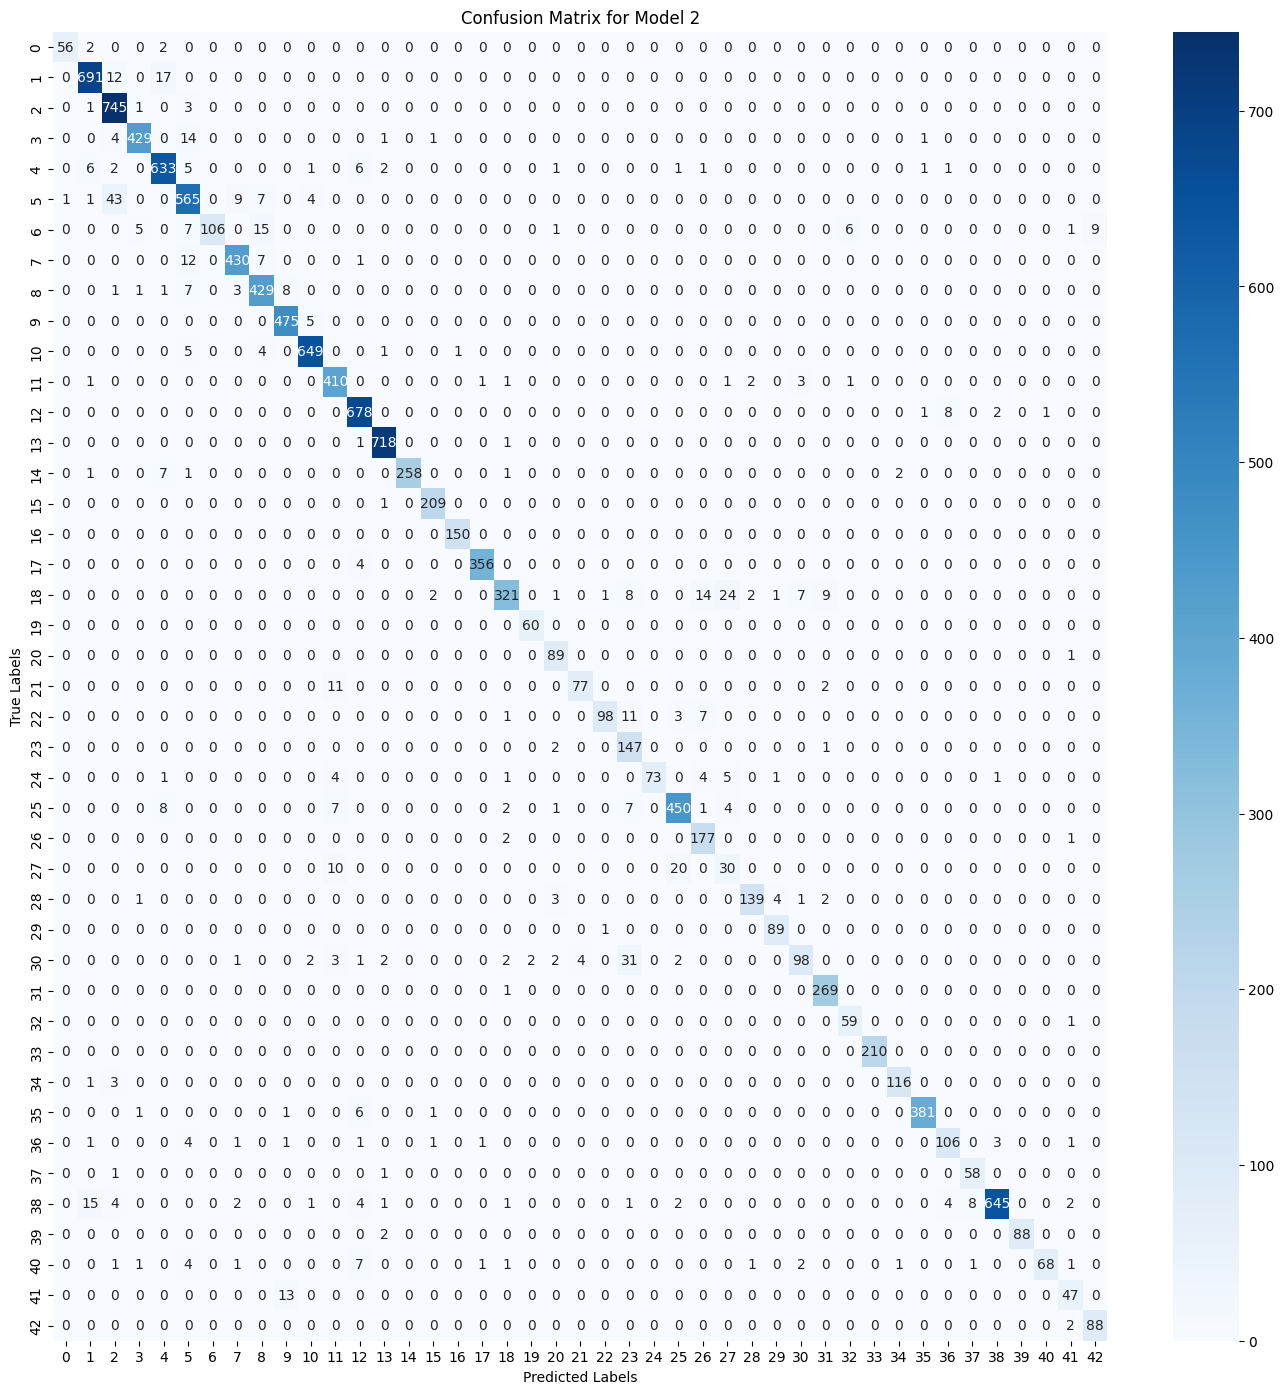

In [40]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 2')
plt.show()


## Model Architecture -3: ResNet50

The following code snippet demonstrates the creation of a CNN model using ResNet50 as the base model. By incorporating additional layers, the model can be fine-tuned for specific tasks. The inclusion of batch normalization layers and dropout layers aids in regularization and prevents overfitting. The output layer, utilizing softmax activation, is designed for multi-class classification with 43 units. The model summary provides an overview of the architecture and parameter count for each layer.

In [41]:
from tensorflow.keras.applications import ResNet50
import tensorflow
import tensorflow.keras as K
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Load the pre-trained ResNet50 model without the top classification layer
res = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Create a sequential model
model = K.models.Sequential()

# Add the ResNet50 base model to the sequential model
model.add(res)

# Flatten the output from the ResNet50 base model
model.add(K.layers.Flatten())

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 256 units and ReLU activation function
model.add(K.layers.Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.5 to prevent overfitting
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 128 units and ReLU activation function
model.add(K.layers.Dense(128, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 64 units and ReLU activation function
model.add(K.layers.Dense(64, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add the output layer with 43 units and softmax activation function for multi-class classification
model.add(K.layers.Dense(43, activation='softmax'))

# Print the summary of the model
model.summary()


94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_12 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 256)              

In [42]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define EarlyStopping callback
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define ModelCheckpoint callback to save the best model
mc = ModelCheckpoint('best_res50.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_validation), callbacks=[stop, mc], batch_size=500)


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.4284 - accuracy: 0.1545
Epoch 1: val_loss improved from inf to 4.31303, saving model to best_res50.h5
70/70 [==============================] - 83s 427ms/step - loss: 3.4284 - accuracy: 0.1545 - val_loss: 4.3130 - val_accuracy: 0.2778
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 2.0752 - accuracy: 0.4538
Epoch 2: val_loss improved from 4.31303 to 1.88657, saving model to best_res50.h5
70/70 [==============================] - 13s 187ms/step - loss: 2.0752 - accuracy: 0.4538 - val_loss: 1.8866 - val_accuracy: 0.5054
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 1.3713 - accuracy: 0.6468
Epoch 3: val_loss improved from 1.88657 to 1.62164, saving model to best_res50.h5
70/70 [==============================] - 17s 241ms/step - loss: 1.3713 - accuracy: 0.6468 - val_loss: 1.6216 - val_accuracy: 0.6254
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 0.9490 - acc

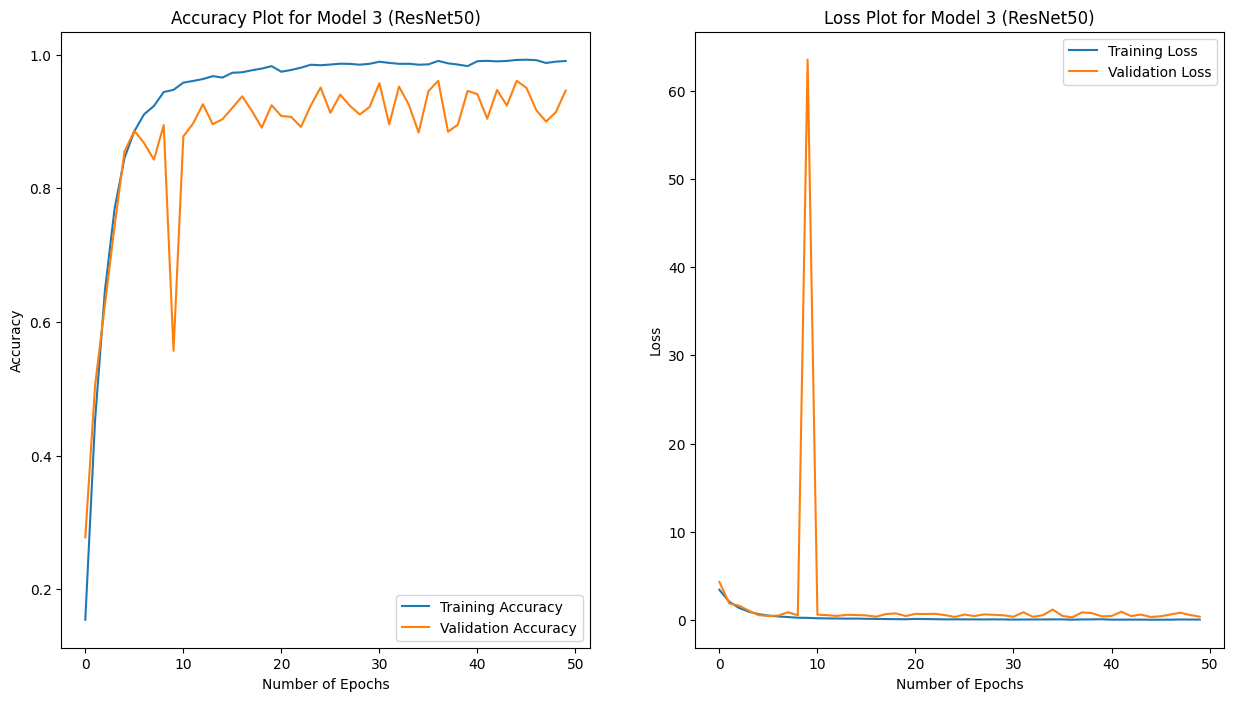

In [43]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 3 (ResNet50)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 3 (ResNet50)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 3 Evaluation & Report

In [44]:
# Load the best performing ResNet model
best_ResNet50 = load_model('best_res50.h5')

In [45]:
# Evaluate the model on the test data
evaluation_results = best_ResNet50.evaluate(X_test, y_test)


395/395 [==============================] - 6s 11ms/step - loss: 0.4606 - accuracy: 0.9452


In [46]:
# Convert grayscale images to RGB
#X_test_gray_norm_rgb = tf.tile(X_test_gray_norm, [1, 1, 1, 3])

# Assuming you have predictions for X_test_gray_norm
y_pred = best_ResNet50.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 3 (ResNet50):")
print(classification_rep)


395/395 [==============================] - 4s 8ms/step

Classification Report for Model 3 (ResNet50):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        60
           1       0.98      0.96      0.97       720
           2       0.94      0.99      0.96       750
           3       0.99      0.94      0.96       450
           4       0.96      0.98      0.97       660
           5       0.91      0.95      0.93       630
           6       1.00      0.86      0.92       150
           7       0.99      0.94      0.96       450
           8       0.95      0.95      0.95       450
           9       0.95      1.00      0.97       480
          10       1.00      0.98      0.99       660
          11       0.96      0.91      0.94       420
          12       0.99      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      0.98      0.99       270
          15       1.00      1.00

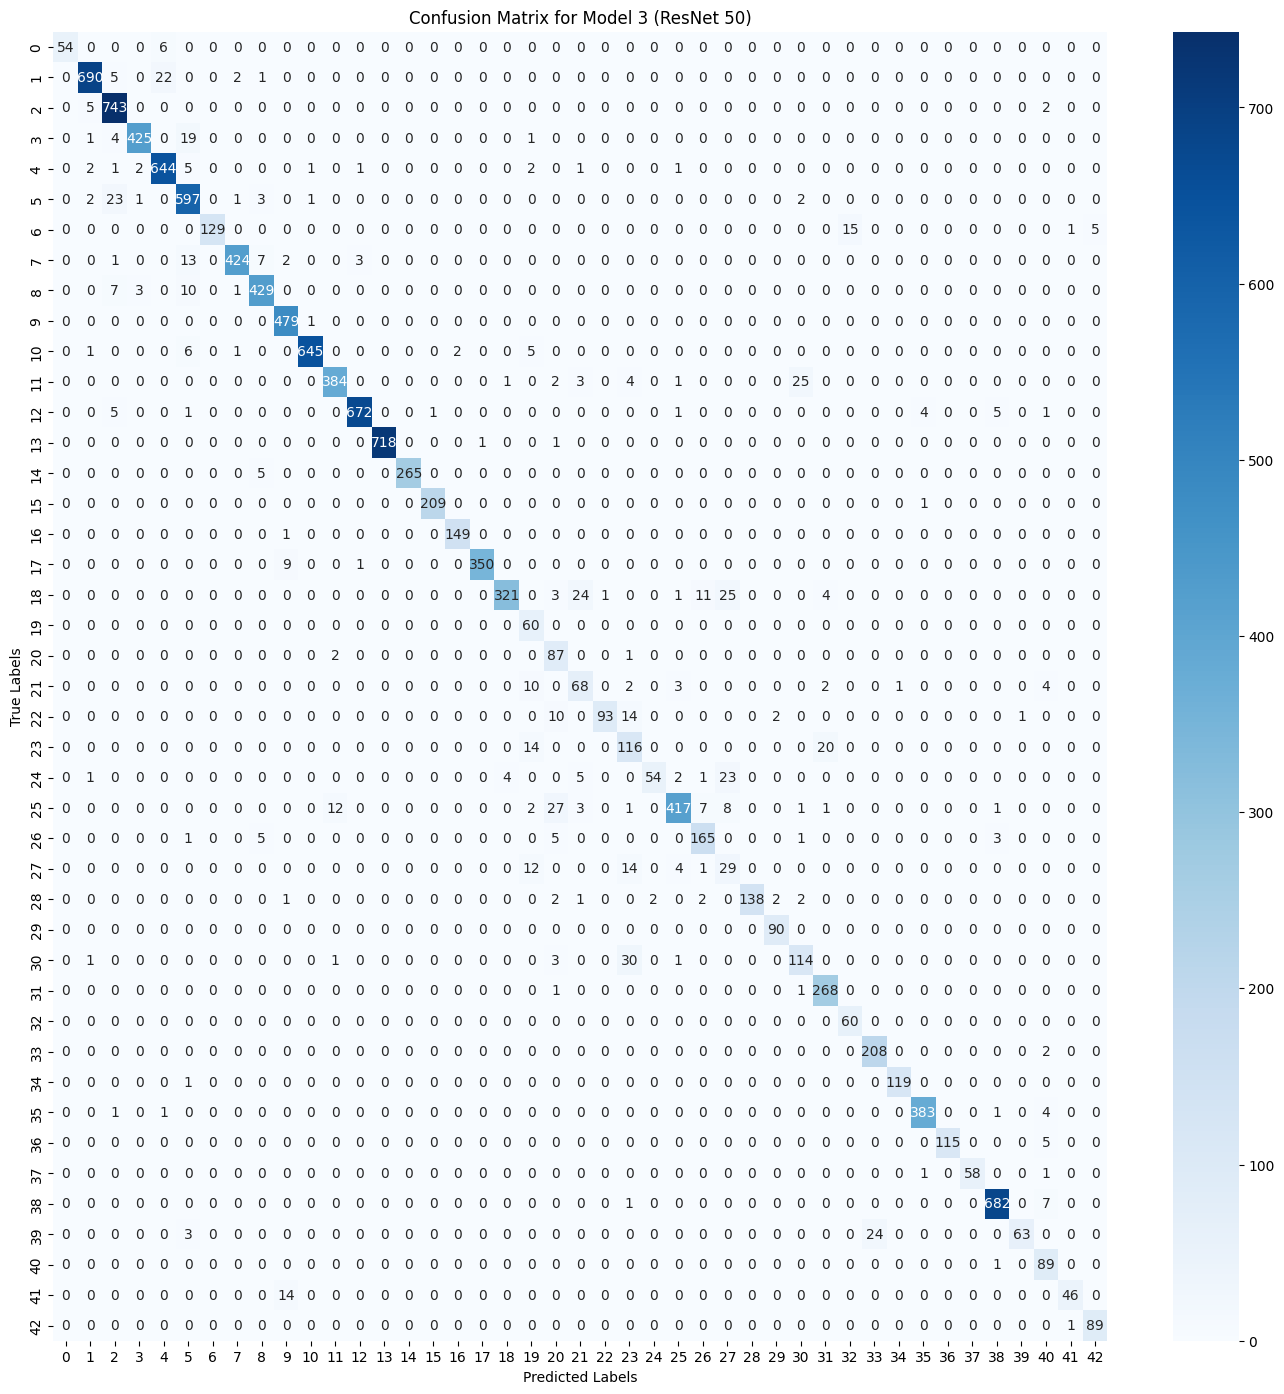

In [47]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 3 (ResNet 50)')
plt.show()

## Model Architecture -4: ResNet101

In [48]:
import tensorflow as tf
import tensorflow.keras as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet101

# Load the pre-trained ResNet101 model without the top classification layer
res = ResNet101(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Create a sequential model
model = K.models.Sequential()

# Add the ResNet101 base model to the sequential model
model.add(res)

# Flatten the output from the ResNet101 base model
model.add(K.layers.Flatten())

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 256 units and ReLU activation function
model.add(K.layers.Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.5 to prevent overfitting
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 128 units and ReLU activation function
model.add(K.layers.Dense(128, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 64 units and ReLU activation function
model.add(K.layers.Dense(64, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add the output layer with 43 units and softmax activation function for multi-class classification
model.add(K.layers.Dense(43, activation='softmax'))

# Print the summary of the model
model.summary()


171446536/171446536 [==============================] - 9s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1, 1, 2048)        42658176  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_16 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_17 (Bat  (None, 256)            

In [49]:
from tensorflow.keras.optimizers import Adam

# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define EarlyStopping callback
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define ModelCheckpoint callback to save the best model
mc = ModelCheckpoint('best_res101.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_validation), callbacks=[stop, mc], batch_size=500)


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.4758 - accuracy: 0.1375
Epoch 1: val_loss improved from inf to 28288.36328, saving model to best_res101.h5
70/70 [==============================] - 124s 655ms/step - loss: 3.4758 - accuracy: 0.1375 - val_loss: 28288.3633 - val_accuracy: 0.0726
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 2.3086 - accuracy: 0.3825
Epoch 2: val_loss improved from 28288.36328 to 2.94461, saving model to best_res101.h5
70/70 [==============================] - 32s 463ms/step - loss: 2.3086 - accuracy: 0.3825 - val_loss: 2.9446 - val_accuracy: 0.2841
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 1.6195 - accuracy: 0.5591
Epoch 3: val_loss did not improve from 2.94461
70/70 [==============================] - 19s 267ms/step - loss: 1.6195 - accuracy: 0.5591 - val_loss: 3.9427 - val_accuracy: 0.4710
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 1.2512 - accuracy: 0.6502
Epoch 

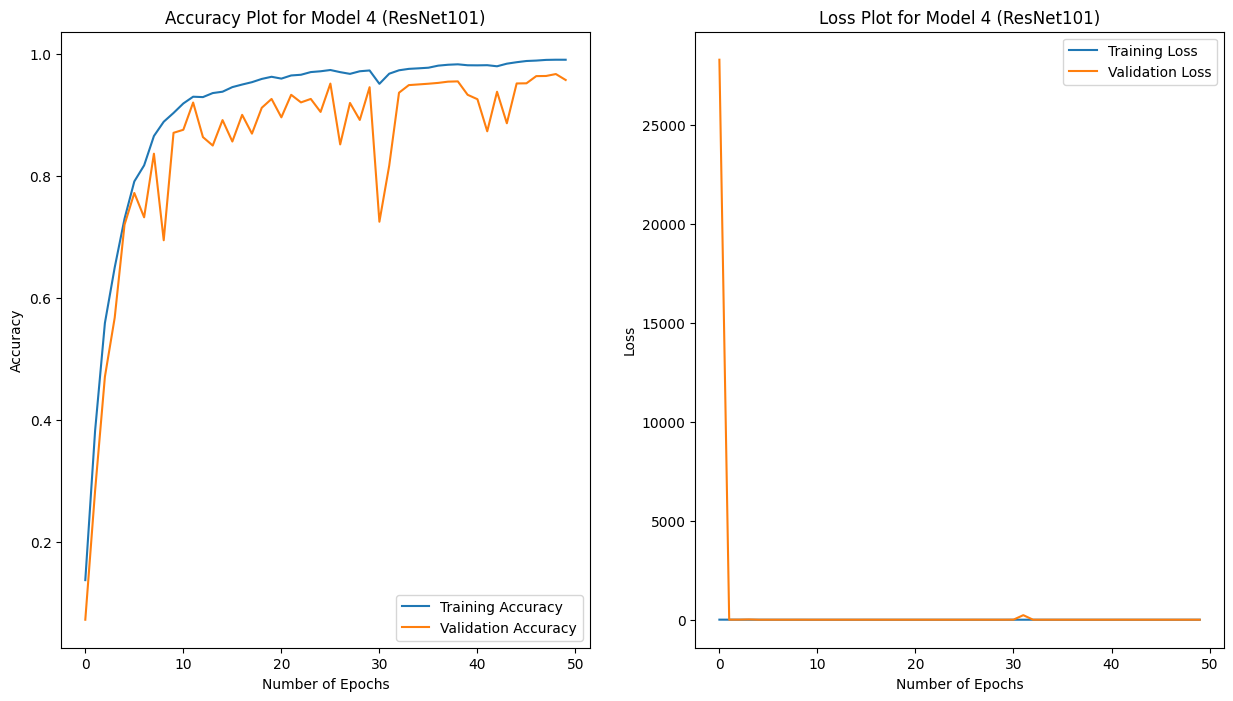

In [50]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 4 (ResNet101)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 4 (ResNet101)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 4 Evaluation & Report

In [51]:
from keras.models import load_model

# Load the best performing ResNet model
best_ResNet101 = load_model('best_res101.h5')

In [52]:
# Evaluate the model on the test data
evaluation_results = best_ResNet101.evaluate(X_test, y_test)


395/395 [==============================] - 10s 19ms/step - loss: 0.4052 - accuracy: 0.9528


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_ResNet101.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 4 (ResNet 101):")
print(classification_rep)


395/395 [==============================] - 8s 17ms/step

Classification Report for Model 4 (ResNet 101):
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.94      0.99      0.96       720
           2       0.99      0.97      0.98       750
           3       1.00      0.92      0.96       450
           4       1.00      0.91      0.95       660
           5       0.88      0.99      0.93       630
           6       0.99      0.89      0.94       150
           7       0.99      0.96      0.97       450
           8       0.99      0.91      0.95       450
           9       0.98      0.99      0.99       480
          10       0.99      0.98      0.99       660
          11       0.93      0.92      0.93       420
          12       0.99      0.98      0.99       690
          13       0.94      1.00      0.97       720
          14       1.00      1.00      1.00       270
          15       0.97      0

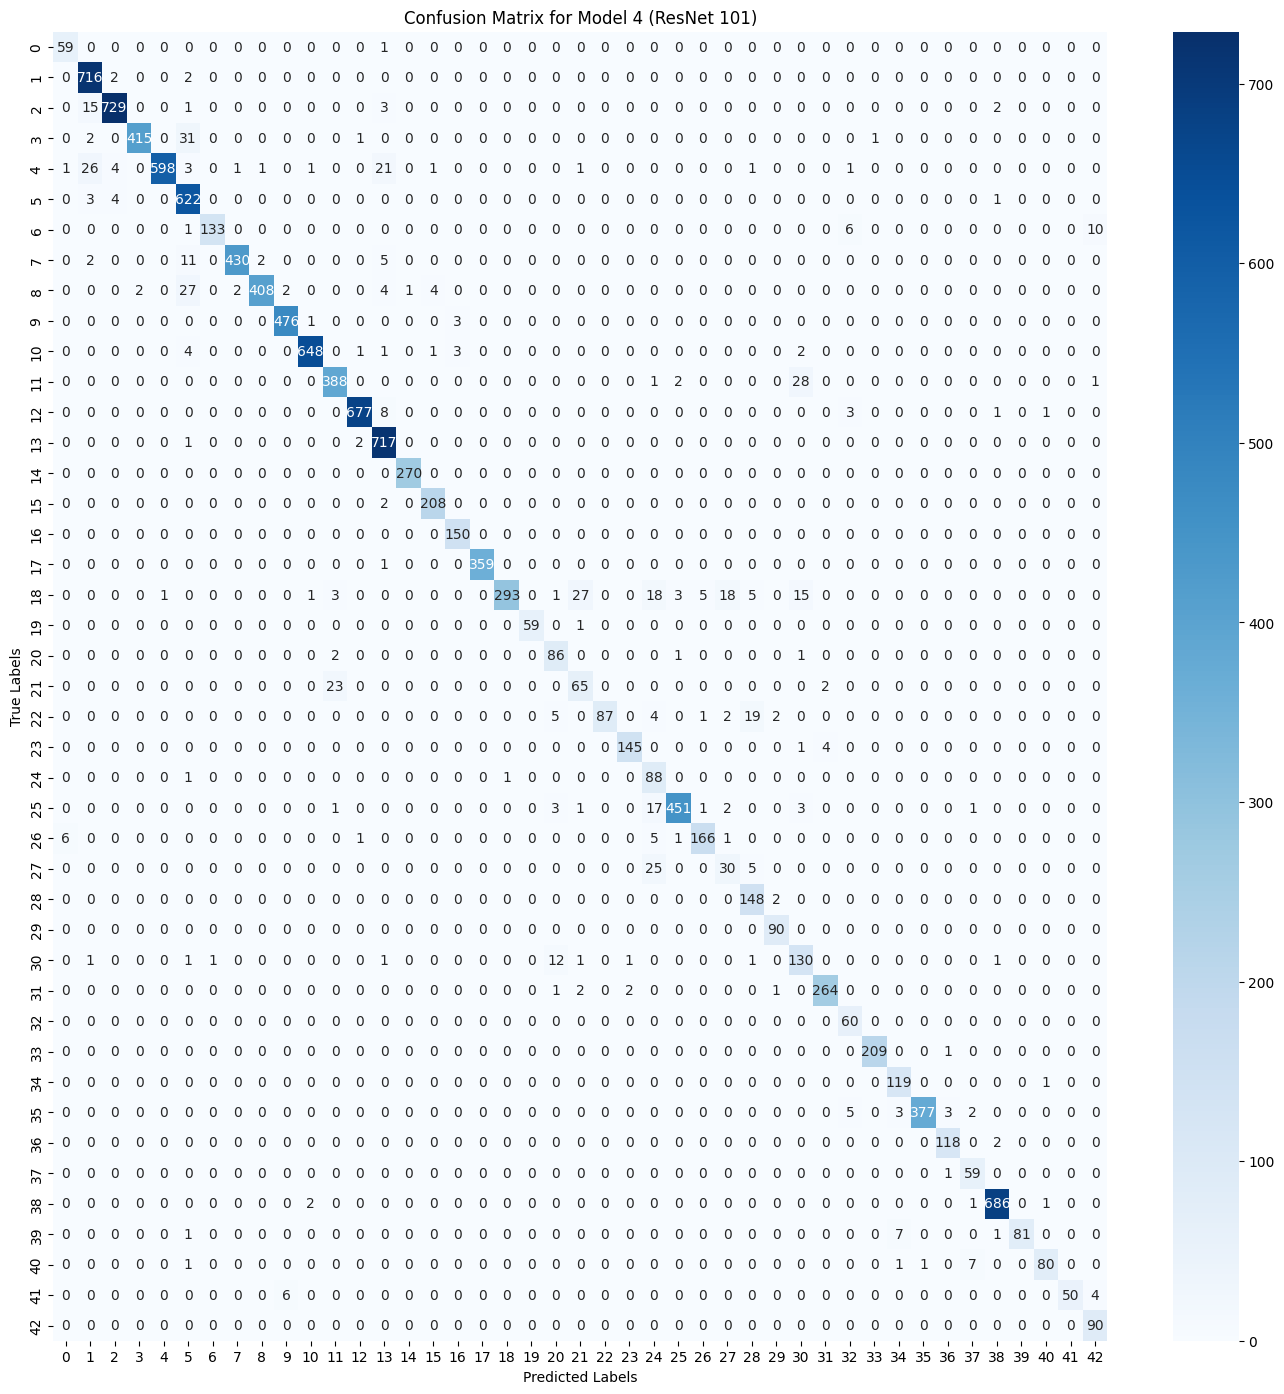

In [54]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 4 (ResNet 101)')
plt.show()


## Model Architecture -5: VGGNet

Below provided code establishes a Convolutional Neural Network (CNN) model using the VGG architecture. The model comprises multiple convolutional and max pooling layers with varying filter sizes. Convolutional layers employ the Rectified Linear Unit (ReLU) activation function, while the output layer utilizes the softmax activation function for multi-class classification. The model's summary provides an overview of its architecture, including the layer configurations and parameter counts.

In [55]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Create a sequential model
model = Sequential()

# Add the first convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(input_shape=(32, 32, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the second convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the first max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Continue adding more convolutional and max pooling layers with increasing number of filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

# Add two fully connected layers with 4096 units and ReLU activation
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))

# Add the output layer with 43 units and softmax activation for multi-class classification
model.add(Dense(units=43, activation="softmax"))

# Print the summary of the model
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [56]:
# Compile the model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Set up early stopping to monitor validation loss and stop training if no improvement after 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Set up model checkpoint to save the best model based on validation loss
mc = ModelCheckpoint('best_vggnet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Model Fitting
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_validation), callbacks = [stop, mc], batch_size = 500)


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.5649 - accuracy: 0.0590
Epoch 1: val_loss improved from inf to 3.58321, saving model to best_vggnet.h5
70/70 [==============================] - 39s 425ms/step - loss: 3.5649 - accuracy: 0.0590 - val_loss: 3.5832 - val_accuracy: 0.0628
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 3.4274 - accuracy: 0.0930
Epoch 2: val_loss improved from 3.58321 to 3.53090, saving model to best_vggnet.h5
70/70 [==============================] - 14s 192ms/step - loss: 3.4274 - accuracy: 0.0930 - val_loss: 3.5309 - val_accuracy: 0.1054
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 3.2978 - accuracy: 0.1316
Epoch 3: val_loss improved from 3.53090 to 3.46603, saving model to best_vggnet.h5
70/70 [==============================] - 14s 195ms/step - loss: 3.2978 - accuracy: 0.1316 - val_loss: 3.4660 - val_accuracy: 0.0980
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 3.0104 - 

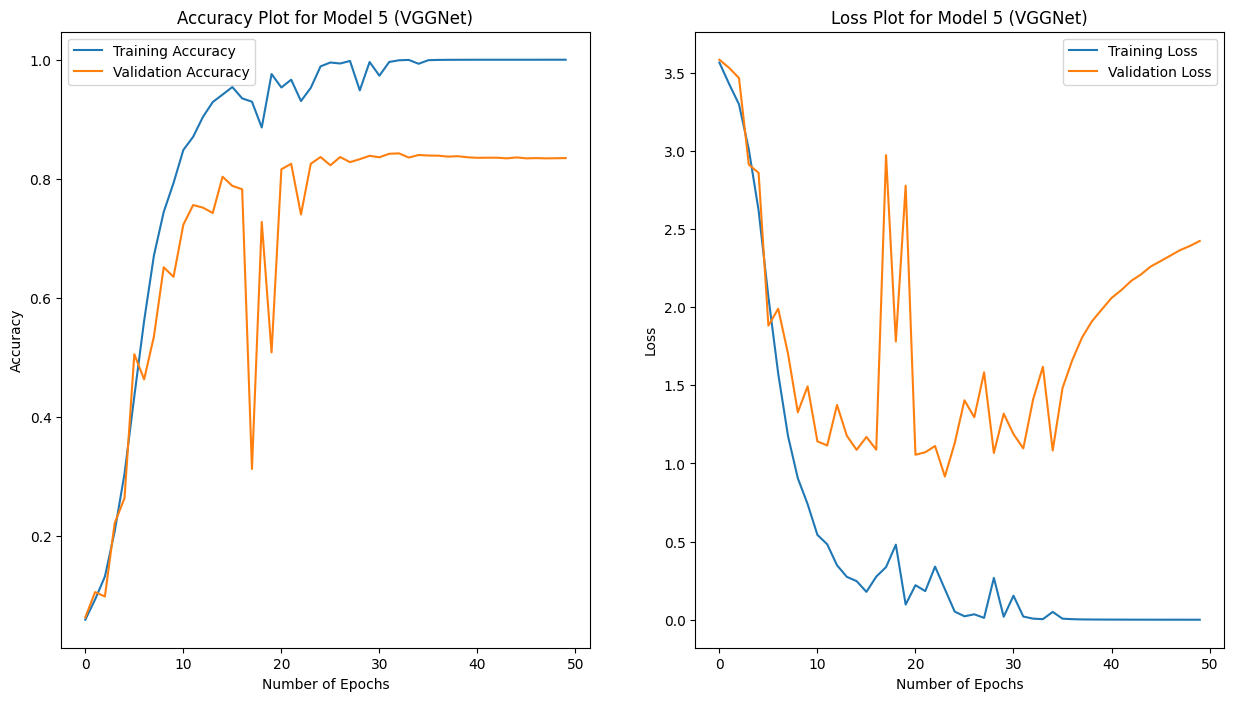

In [57]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 5 (VGGNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 5 (VGGNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 5 Evaluation & Report

In [58]:
# Load the best performing ResNet model
best_VGGNet = load_model('best_vggnet.h5')

In [59]:
# Evaluate the model on the test data
evaluation_results = best_VGGNet.evaluate(X_test, y_test)


395/395 [==============================] - 4s 9ms/step - loss: 1.0684 - accuracy: 0.8284


In [60]:
# Assuming you have predictions for X_test_gray_norm
y_pred = best_VGGNet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 5 (VGGNet):")
print(classification_rep)


395/395 [==============================] - 3s 7ms/step

Classification Report for Model 5 (VGGNet):
              precision    recall  f1-score   support

           0       0.57      0.07      0.12        60
           1       0.80      0.86      0.83       720
           2       0.71      0.91      0.80       750
           3       0.74      0.81      0.78       450
           4       0.87      0.80      0.84       660
           5       0.77      0.82      0.79       630
           6       1.00      0.72      0.84       150
           7       0.84      0.77      0.80       450
           8       0.77      0.64      0.70       450
           9       0.95      0.85      0.90       480
          10       0.93      0.92      0.93       660
          11       0.72      0.89      0.79       420
          12       0.90      0.97      0.93       690
          13       0.97      0.96      0.97       720
          14       0.83      0.96      0.89       270
          15       0.82      0.84  

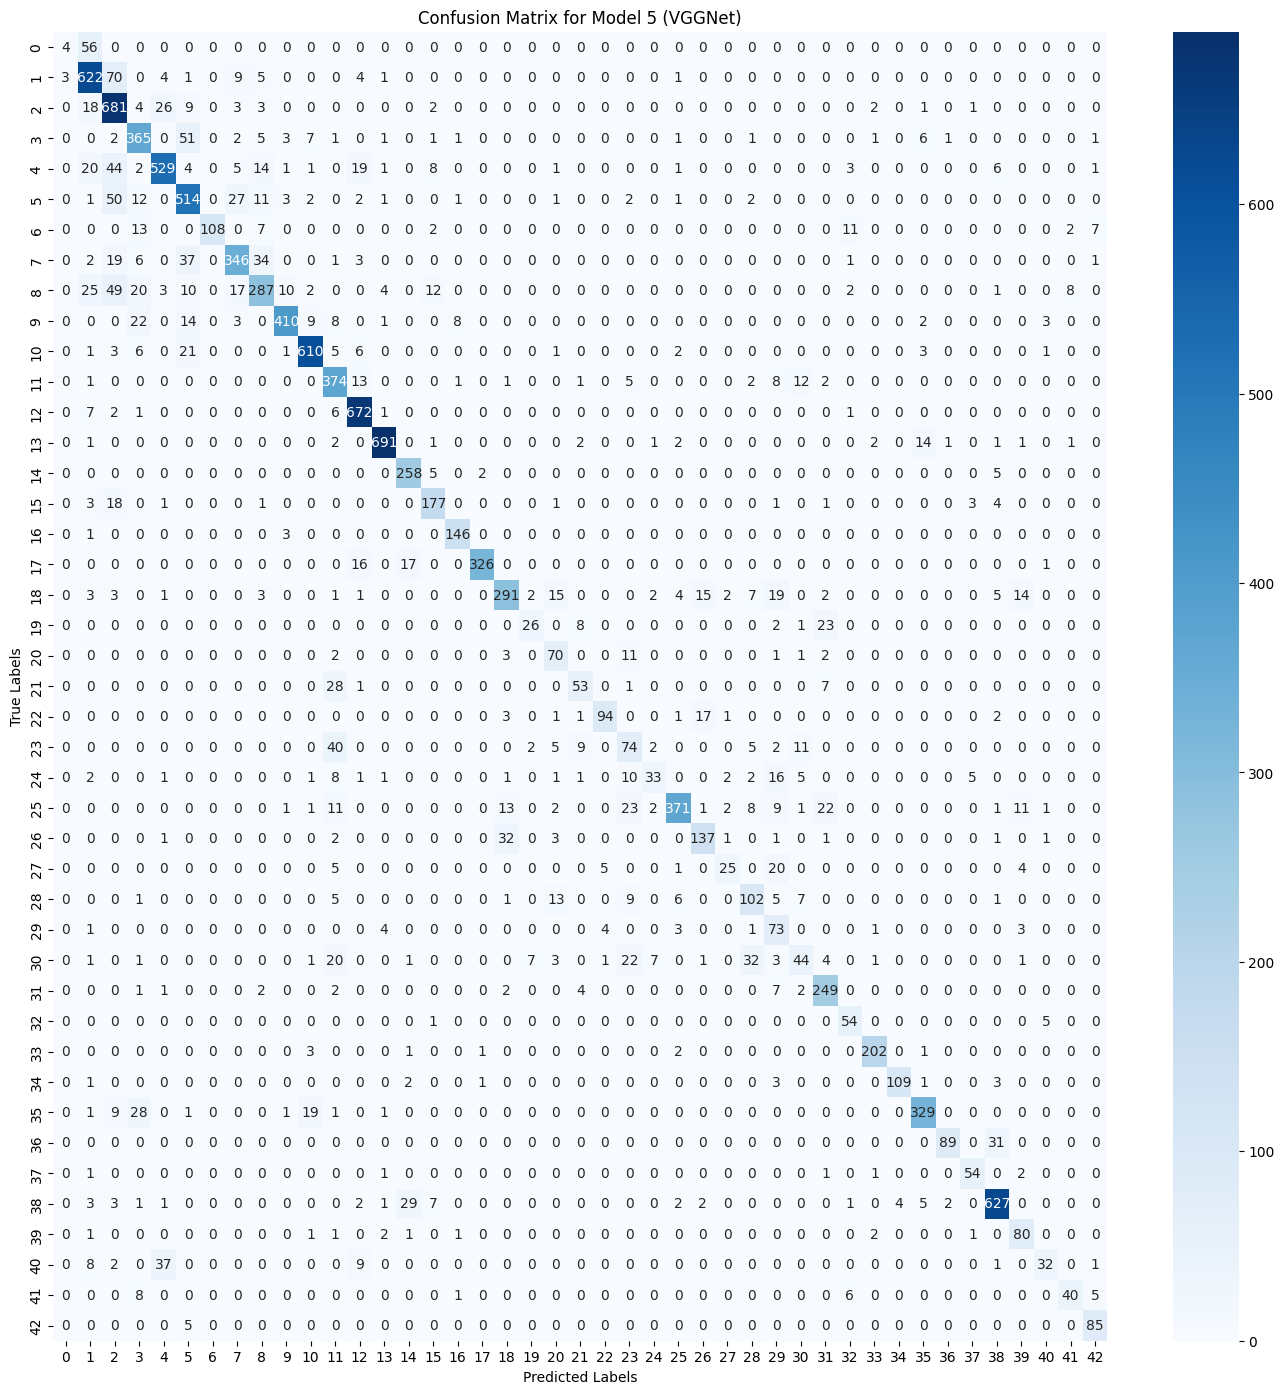

In [61]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 5 (VGGNet)')
plt.show()


## Model Architecture - 6: CNN

The below model is a convolutional neural network (CNN) designed for image classification. It consists of multiple convolutional layers with ReLU activation, max pooling layers, and dropout layers for regularization. The final architecture includes three sets of convolutional layers, followed by max pooling and dropout, and ends with a fully connected layer and an output layer with softmax activation. The model is capable of processing grayscale images of size 32x32x1 and has a total of 43 output units, representing the number of classes in the classification task. The summary provides a concise overview of the model's structure and the number of parameters in each layer.

In [62]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D, Dropout

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, 'same' padding, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))

# Add another convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add more convolutional and pooling layers, followed by dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 43 units (corresponding to the number of classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [63]:
# Define early stopping callback to monitor validation loss and stop training if it doesn't improve for 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('best_CNN_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Compile the model with the specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_gray_norm, y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_gray_norm, y_validation),
                    shuffle=True,
                    callbacks=[stop, mc])


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.2570 - accuracy: 0.1362
Epoch 1: val_loss improved from inf to 2.36048, saving model to best_CNN_model.h5
70/70 [==============================] - 9s 74ms/step - loss: 3.2570 - accuracy: 0.1362 - val_loss: 2.3605 - val_accuracy: 0.3823
Epoch 2/50
69/70 [============================>.] - ETA: 0s - loss: 1.4069 - accuracy: 0.5840
Epoch 2: val_loss improved from 2.36048 to 0.59642, saving model to best_CNN_model.h5
70/70 [==============================] - 3s 39ms/step - loss: 1.4011 - accuracy: 0.5856 - val_loss: 0.5964 - val_accuracy: 0.8327
Epoch 3/50
69/70 [============================>.] - ETA: 0s - loss: 0.4869 - accuracy: 0.8489
Epoch 3: val_loss improved from 0.59642 to 0.24204, saving model to best_CNN_model.h5
70/70 [==============================] - 3s 38ms/step - loss: 0.4856 - accuracy: 0.8493 - val_loss: 0.2420 - val_accuracy: 0.9261
Epoch 4/50
69/70 [============================>.] - ETA: 0s - loss: 0.2516

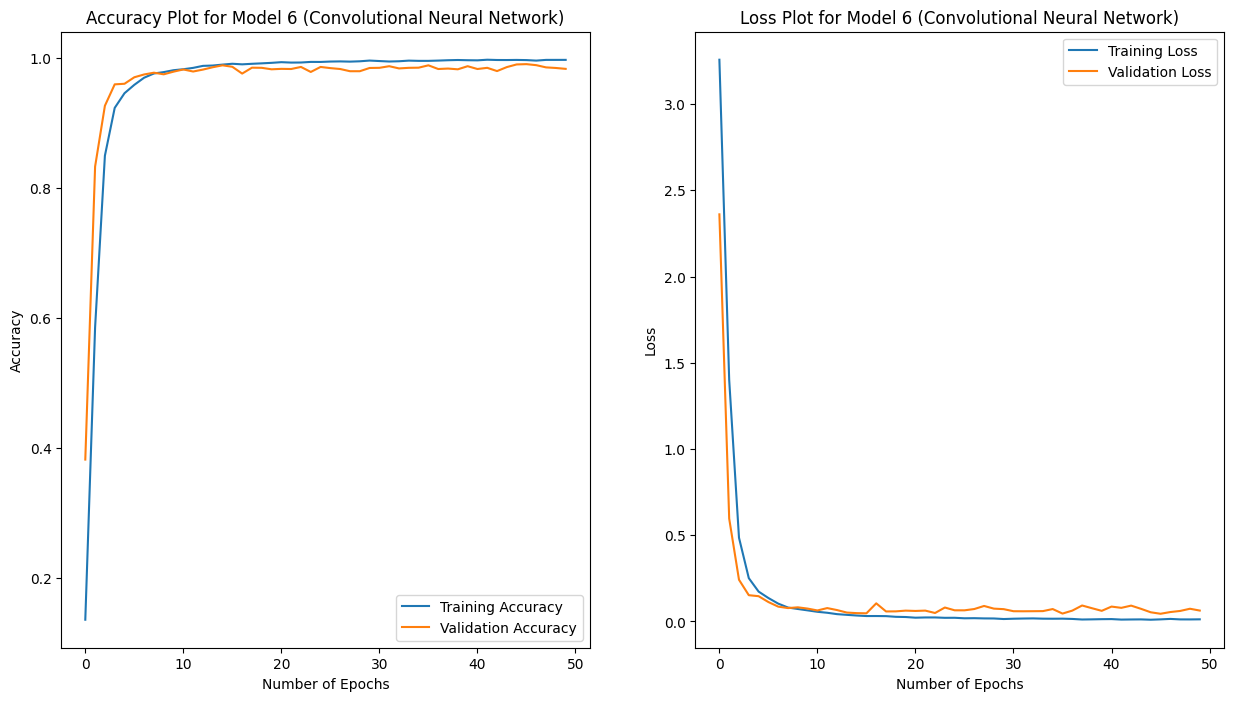

In [64]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 6 (Convolutional Neural Network)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 6 (Convolutional Neural Network)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 6 Evaluation & Report

In [65]:
from keras.models import Sequential, load_model

# Load the best trained model from the saved file
best_CNN_model = load_model('best_CNN_model.h5')

# Evaluate the model performance on the test data
evaluation_results = best_CNN_model.evaluate(X_test_gray_norm, y_test)


395/395 [==============================] - 2s 4ms/step - loss: 0.1234 - accuracy: 0.9712


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_CNN_model.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 6 (CNN):")
print(classification_rep)


395/395 [==============================] - 1s 2ms/step

Classification Report for Model 6 (CNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      1.00      0.97       720
           2       1.00      0.99      0.99       750
           3       0.96      0.95      0.96       450
           4       0.97      0.99      0.98       660
           5       0.96      0.96      0.96       630
           6       1.00      0.87      0.93       150
           7       0.98      0.99      0.99       450
           8       0.97      0.98      0.97       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.94      0.96      0.95       420
          12       0.99      0.99      0.99       690
          13       1.00      0.99      1.00       720
          14       0.93      0.99      0.96       270
          15       1.00      0.99     

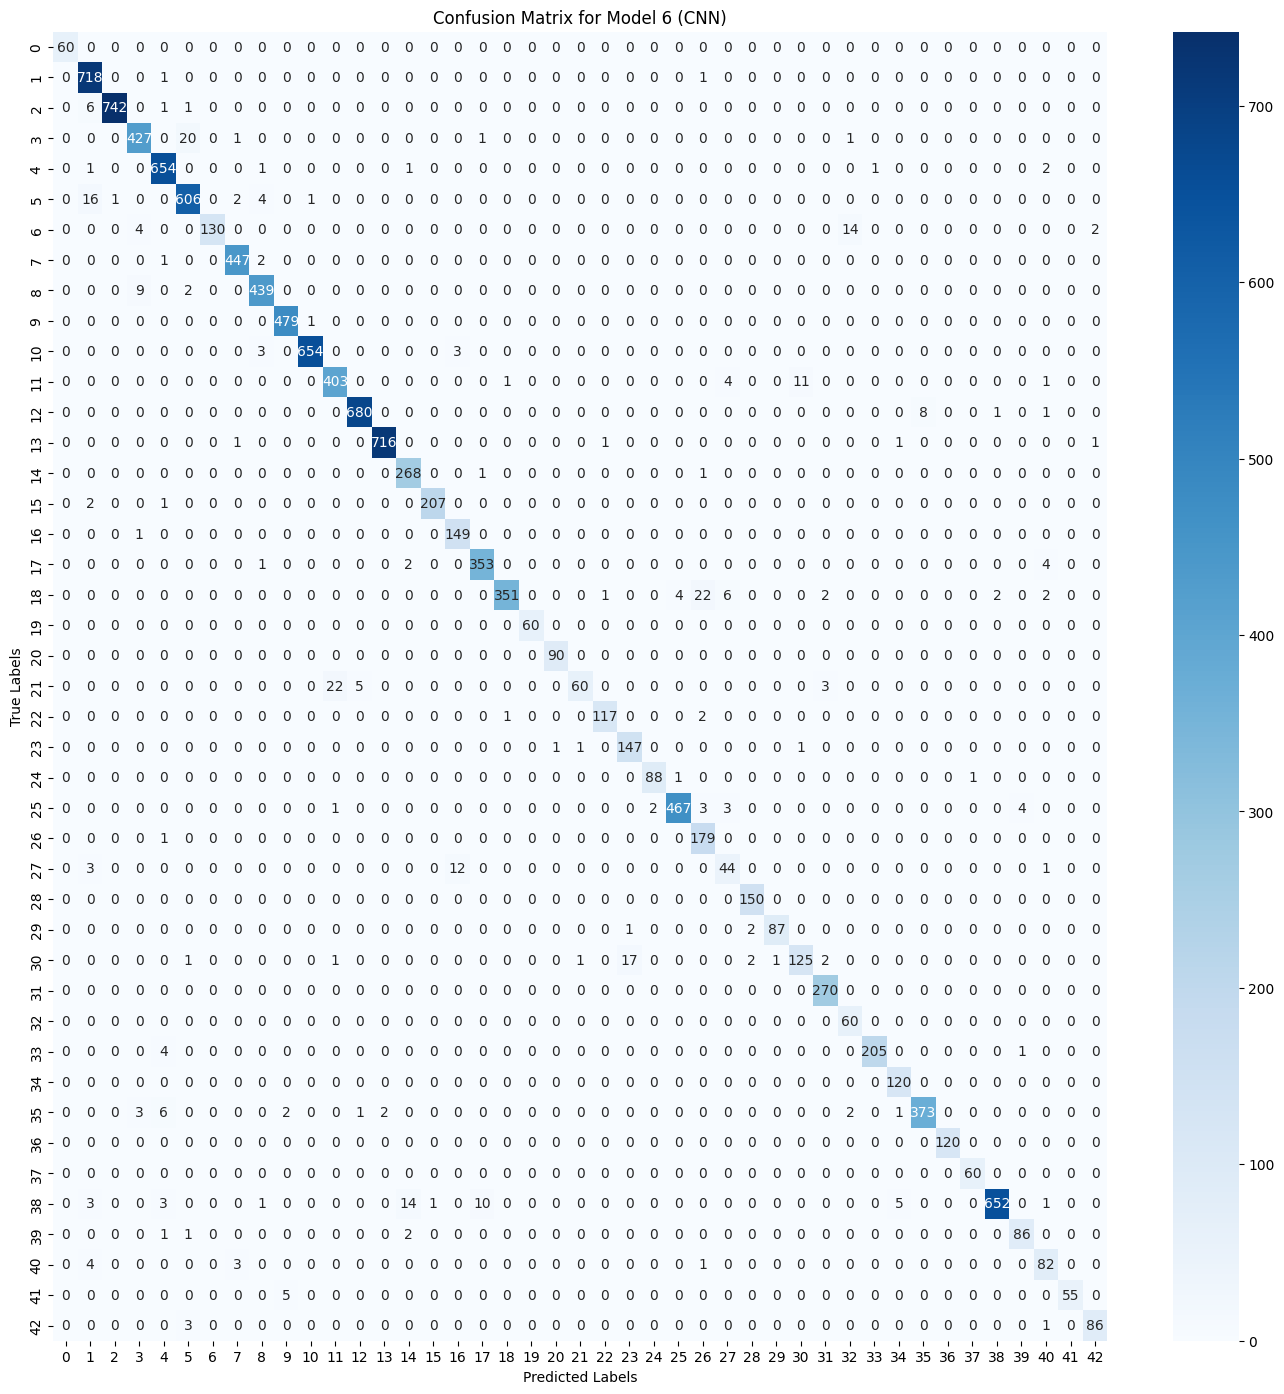

In [67]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 6 (CNN)')
plt.show()


## Results Comparison among 6 different Neural Networks Architecture

#### Accuracy of different models are:

    AlexNet: 88.84%
    DenseNet: 95.12%
    ResNet50: 94.83%
    ResNet101: 94.95%
    VGGNet: 85.03%
    CNN Model: 97.31%

Based on above results, the CNN Model achieved the highest accuracy of 97.31%, making it the most effective architecture for traffic sign classification in this study. The CNN Model likely benefited from its ability to learn complex spatial patterns and hierarchical representations through convolutional and pooling layers.

The DenseNet architecture also performed well with an accuracy of 95.12%. DenseNet's unique connectivity pattern, where each layer receives direct inputs from all preceding layers, might have contributed to its strong performance by promoting feature reuse and alleviating the vanishing gradient problem.

The ResNet50 and ResNet101 architectures achieved similar accuracies of 94.83% and 94.95% respectively. ResNet models employ residual connections to enable training of very deep networks, which likely helped in capturing intricate details of traffic signs and improving overall accuracy.

On the other hand, VGGNet achieved an accuracy of 85.03%, which is relatively lower compared to other models. VGGNet's uniform architecture with smaller filter sizes might have limited its ability to capture fine-grained details, resulting in reduced accuracy.

In conclusion, the CNN Model demonstrated the highest accuracy among the evaluated architectures, followed closely by DenseNet, ResNet50, and ResNet101. These models showcase the effectiveness of convolutional neural networks in traffic sign classification tasks, while VGGNet achieved a comparatively lower accuracy. It is important to note that the choice of the best architecture depends on the specific dataset and task at hand, and further experimentation and tuning may be necessary for optimal results.

### Prediction on Test Data with Convolutional Neural Network model

395/395 [==============================] - 1s 2ms/step
Accuracy on real test data: 97.12%
Real Label: 16, Predicted Label: 16


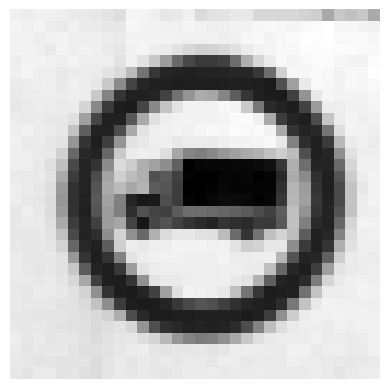

Real Label: 1, Predicted Label: 1


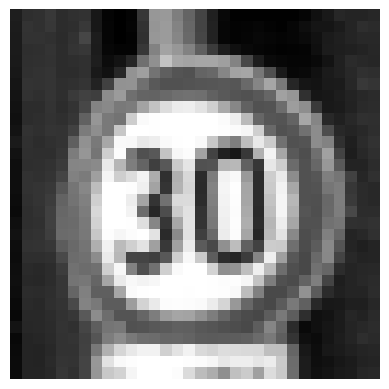

Real Label: 38, Predicted Label: 38


Real Label: 33, Predicted Label: 33


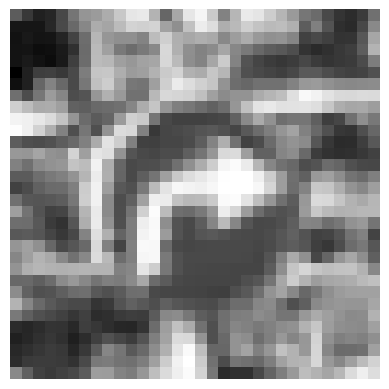

Real Label: 11, Predicted Label: 11


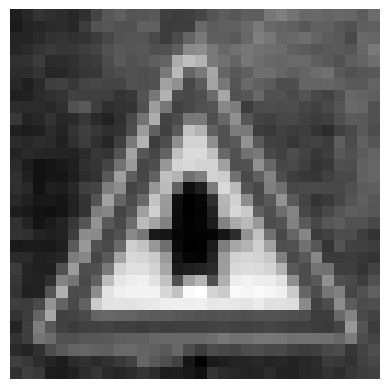

Real Label: 38, Predicted Label: 38


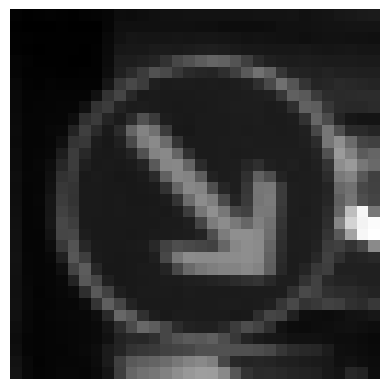

Real Label: 18, Predicted Label: 18


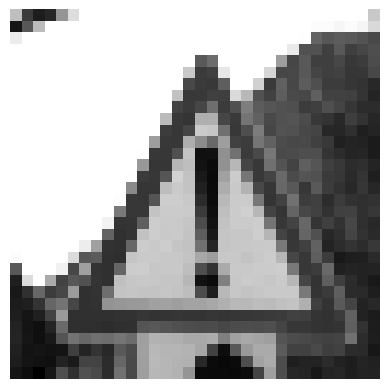

Real Label: 12, Predicted Label: 12


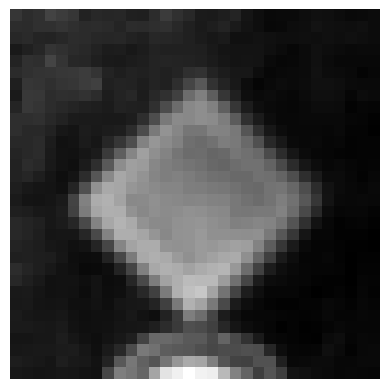

Real Label: 25, Predicted Label: 25


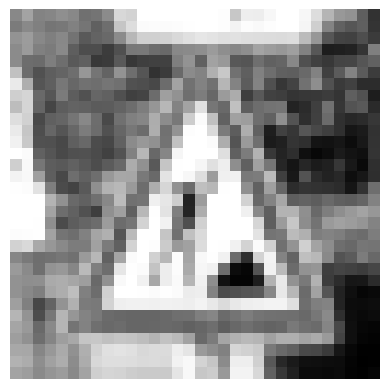

Real Label: 35, Predicted Label: 35


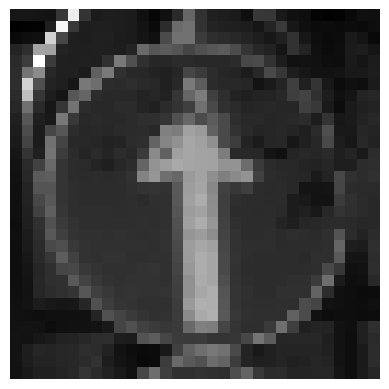

In [68]:
import numpy as np

# Predict on real test data
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on real test data: {:.2%}".format(accuracy))

# Print test images with real and predicted labels
for i in range(10):
    # Display the test image
    plt.imshow(X_test_gray_norm[i], cmap='gray')
    plt.axis('off')

    # Get the real and predicted labels
    real_label = np.argmax(y_test[i])
    predicted_label = predicted_labels[i]

    # Print the labels
    print("Real Label: {}, Predicted Label: {}".format(real_label, predicted_label))

    # Show the plot
    plt.show()


In [69]:
print(sign_names)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric']


395/395 [==============================] - 1s 3ms/step
Accuracy on test dataset: 97.12%


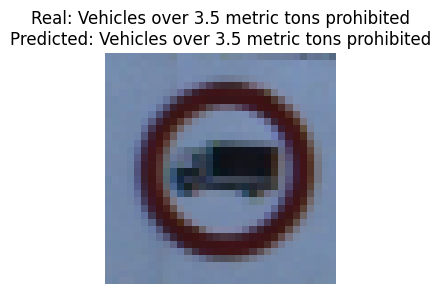

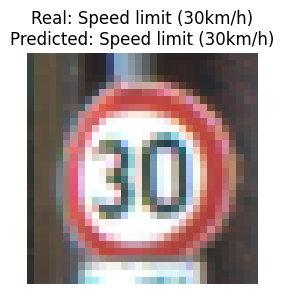

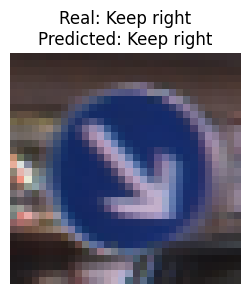

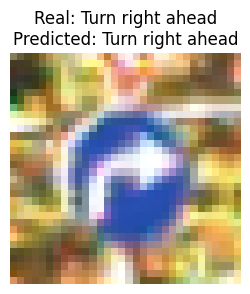

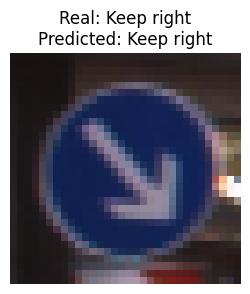

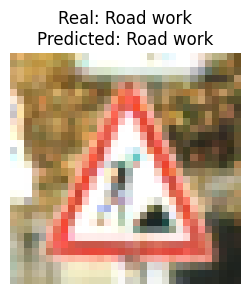

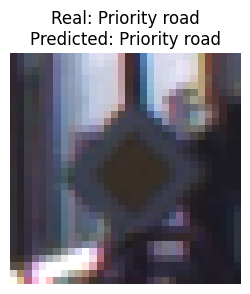

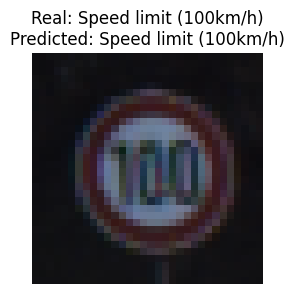

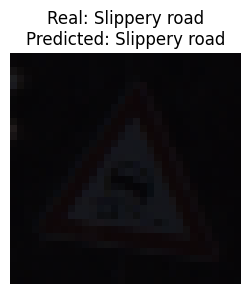

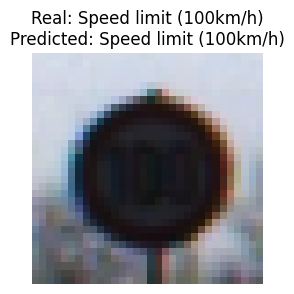

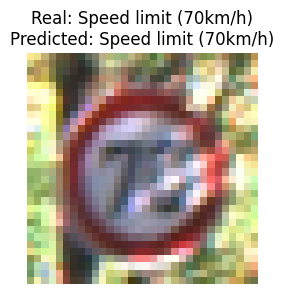

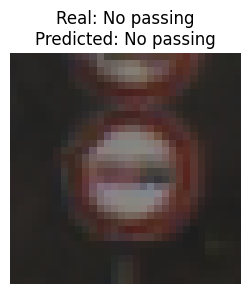

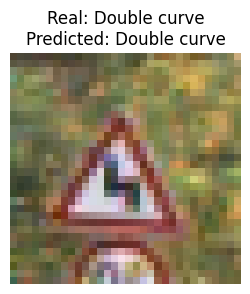

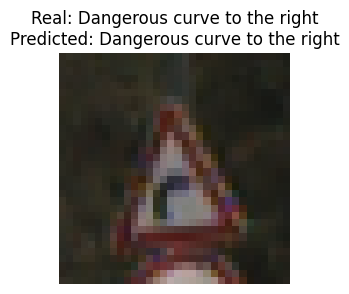

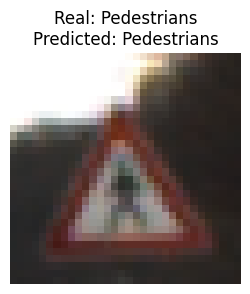

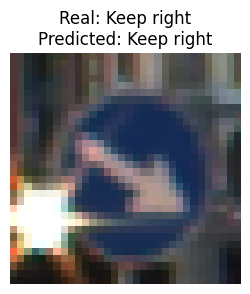

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test dataset
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to class names
predicted_classes = [sign_names[label] for label in predicted_labels]

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on test dataset: {:.2%}".format(accuracy))

# Visualize the test dataset with real and predicted labels
for i in range(20):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Real: {}\nPredicted: {}".format(sign_names[np.argmax(y_test[i])], predicted_classes[i]))
    plt.axis('off')
    plt.show()
